In [1]:
import numpy as np
import matplotlib
from datascience import *
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt

In [202]:
def calc_lambdas(df_): 
    df = df_.copy()
    #constantes
    vh = 246.22
    mh = 125.11
    theta = df_.st
    ms2 = df_.Ms2 *1e-3
    vphi = df_.MAp * 1e-3/ (2*df_.gX)
    cos2t = np.cos(theta)**2
    sin2t = np.sin(theta)**2
    sin2tt = np.sin(2*theta)
    #-----------------------------------------------------------------
    #Calculo de lambdas
    #-----------------------------------------------------------------
    lambdah = (mh**2 * cos2t + ms2**2 * sin2t) / (2*vh**2)
    lambdaphi = (mh**2* sin2t + ms2**2 * cos2t)/ (2*vphi**2)
    lambdaphih = ((ms2**2 - mh**2)*sin2tt) / (2*vh*vphi)
    df['lambdah'] = lambdah
    df['lambdaphi'] = lambdaphi
    df['lambdaphih'] = lambdaphih
    return df 

#(df.lambdaphih > - np.sqrt(4*df.lambdah*df.lambdaphi)) & 
def restriccion_1(df_):
    df = df_.copy()
    df = calc_lambdas(df)
    factor = np.sqrt(4*np.pi)
    df = df[(0 <= df.lambdah) & (df.lambdah<= factor)]
    df = df[(0 <= df.lambdaphi) & (df.lambdaphi<= factor)]
    df = df[(df.lambdah * df.lambdaphi - df.lambdaphih**2 / 4 > 0) & (df.lambdaphih <= factor)]
    return df

def restriccion_2(df_):
    df = df_.copy()
    df['life_time'] = 1 / gammachi2(df)
    #df['delta_mass'] = df['Mx1'] * df['mass_relative']
    return df[(1/4)*df.alphaf**2*df.Mx1 < df.Ms2]

def restriccion_3(df_):
    df = df_.copy()
    return df[df.Ms2  <= 1.45* df.Mx1]
    #return df 

def mask_2(df_):
    mask = [(1/4)*alphaf**2 * mx1 < mphi 
        for mx1, mphi, alphaf in zip(
            df_['Mx1'], 
            df_['Ms2'], 
            df_['alphaf'])]
    return mask


def elementos_graficos(label1,label2):
    
    plt.xscale('log')
    plt.yscale('log')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(fontsize=16, framealpha=0.9, loc='best')
    plt.xlim(0.9, 1100)
    plt.ylim(1e-12, 1e-6)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.ylabel(label2, size=22)
    plt.xlabel(label1, size=22)

def calc_delta(df_):
    df = df_.copy() 
    vphi = df.MAp*1e-3 / (2*df.gX)
    return 2* df.yf*vphi 

def gammachi2(df_):
    df = df_.copy()
    alpha = 1 / 137
    alphaD = df.gX ** 2 / (4*np.pi)
    epsilon = df.epsilon
    delta = calc_delta(df)
    MAp = df.MAp * 1e-3
    return (4*alpha*alphaD* epsilon**2 * delta**5)/(15 * np.pi * MAp**4)

$\lambda_H \lambda_\phi - \frac{\lambda_{\phi H}^2}{4} > 0$

In [203]:
path0p01 = 'idms_0p01/nuevoScan/'
path0p05 = 'idms_0p05/nuevoScan/'
path0p1 = 'idms_0p1/nuevoScan/'
path0p2 = 'idms_0p2/nuevoScan/'
path0p4 = 'idms_0p4/nuevoScan/'
path0p2_2 = 'idms_0p2/nuevoScan2/'
path0p4_2 = 'idms_0p4/nuevoScan2/'
pathImagenes = 'imagenes_idms/'
pathLimites = 'limitesidms/'
path_filtros_r8 = 'inelasticDarkMatter/'

In [204]:
df_omega_0p01_R3_0p5 = pd.read_csv(f'{path0p01}Delta0p01_alpha0p5_R3_omega.csv')
df_omega_0p01_R4_0p5 = pd.read_csv(f'{path0p01}Delta0p01_alpha0p5_R4_omega.csv')
df_omega_0p01_R5_0p5 = pd.read_csv(f'{path0p01}Delta0p01_alpha0p5_R5_omega.csv')
df_omega_0p01_R8_0p5 = pd.read_csv(f'{path0p01}Delta0p01_alpha0p5_R8_omega.csv')
df_omega_0p01_R10_0p5 = pd.read_csv(f'{path0p01}Delta0p01_alpha0p5_R10_omega.csv')

In [205]:
df_omega_0p01_R3_0p5_1 = restriccion_1(df_omega_0p01_R3_0p5)
df_omega_0p01_R4_0p5_1 = restriccion_1(df_omega_0p01_R4_0p5)
df_omega_0p01_R5_0p5_1 = restriccion_1(df_omega_0p01_R5_0p5)
df_omega_0p01_R8_0p5_1 = restriccion_1(df_omega_0p01_R8_0p5)
df_omega_0p01_R10_0p5_1 = restriccion_1(df_omega_0p01_R10_0p5)

In [206]:
df_omega_0p01_R3_0p5_2 = restriccion_2(df_omega_0p01_R3_0p5_1)
df_omega_0p01_R4_0p5_2 = restriccion_2(df_omega_0p01_R4_0p5_1)
df_omega_0p01_R5_0p5_2 = restriccion_2(df_omega_0p01_R5_0p5_1)
df_omega_0p01_R8_0p5_2 = restriccion_2(df_omega_0p01_R8_0p5_1)
df_omega_0p01_R10_0p5_2 = restriccion_2(df_omega_0p01_R10_0p5_1)

In [207]:
df_omega_0p01_R3_0p5_3 = restriccion_3(df_omega_0p01_R3_0p5_2)
df_omega_0p01_R4_0p5_3 = restriccion_3(df_omega_0p01_R4_0p5_2)
df_omega_0p01_R5_0p5_3 = restriccion_3(df_omega_0p01_R5_0p5_2)
df_omega_0p01_R8_0p5_3 = restriccion_3(df_omega_0p01_R8_0p5_2)
df_omega_0p01_R10_0p5_3 = restriccion_3(df_omega_0p01_R10_0p5_2)

In [208]:

print(len(df_omega_0p01_R3_0p5),len(df_omega_0p01_R3_0p5_1), len(df_omega_0p01_R3_0p5_2), len(df_omega_0p01_R3_0p5_3)) 
print(len(df_omega_0p01_R4_0p5),len(df_omega_0p01_R4_0p5_1), len(df_omega_0p01_R4_0p5_2), len(df_omega_0p01_R4_0p5_3)) 
print(len(df_omega_0p01_R5_0p5),len(df_omega_0p01_R5_0p5_1), len(df_omega_0p01_R5_0p5_2), len(df_omega_0p01_R5_0p5_3)) 
print(len(df_omega_0p01_R8_0p5),len(df_omega_0p01_R8_0p5_1), len(df_omega_0p01_R8_0p5_2), len(df_omega_0p01_R8_0p5_3)) 
print(len(df_omega_0p01_R10_0p5),len(df_omega_0p01_R10_0p5_1), len(df_omega_0p01_R10_0p5_2), len(df_omega_0p01_R10_0p5_3)) 


3767 1438 1438 1427
3807 1610 1610 1548
3547 1419 1419 1331
3059 1148 1148 1010
2734 978 978 875


In [209]:
limite_Delta0p01_alpha0p5 = pd.read_csv(f'{pathLimites}exclusion_delta0p01_7years_alphaD_0p5.txt',sep=' ', names=['MAp','epsilon2'])
limite_Delta0p1_alpha0p1 = pd.read_csv(f'{pathLimites}exclusion_delta_0p1_on-axis_7y_alphaD_0p1.txt',sep=' ', names=['MAp','epsilon2'])
limite_Delta0p05_alpha0p5 = pd.read_csv(f'{pathLimites}exclusion_delta_0p05_7years_alphaD_0p5.txt',sep=' ', names=['MAp','epsilon2'])
limite_Delta0p1_alpha0p5 = pd.read_csv(f'{pathLimites}exclusion_delta_0p1_7years_alphaD_0p5.txt',sep=' ', names=['MAp','epsilon2'])

In [210]:
df_omega_0p05_R3_0p5 = pd.read_csv(f'{path0p05}Delta0p05_alpha0p5_R3_omega.csv')
df_omega_0p05_R4_0p5 = pd.read_csv(f'{path0p05}Delta0p05_alpha0p5_R4_omega.csv')
df_omega_0p05_R5_0p5 = pd.read_csv(f'{path0p05}Delta0p05_alpha0p5_R5_omega.csv')
df_omega_0p05_R8_0p5 = pd.read_csv(f'{path0p05}Delta0p05_alpha0p5_R8_omega.csv')
df_omega_0p05_R10_0p5 = pd.read_csv(f'{path0p05}Delta0p05_alpha0p5_R10_omega.csv')

In [211]:
df_omega_0p05_R3_0p5_1 = restriccion_1(df_omega_0p05_R3_0p5)
df_omega_0p05_R4_0p5_1 = restriccion_1(df_omega_0p05_R4_0p5)
df_omega_0p05_R5_0p5_1 = restriccion_1(df_omega_0p05_R5_0p5)
df_omega_0p05_R8_0p5_1 = restriccion_1(df_omega_0p05_R8_0p5)
df_omega_0p05_R10_0p5_1 = restriccion_1(df_omega_0p05_R10_0p5)

In [212]:

df_omega_0p05_R3_0p5_2 = restriccion_2(df_omega_0p05_R3_0p5_1)
df_omega_0p05_R4_0p5_2 = restriccion_2(df_omega_0p05_R4_0p5_1)
df_omega_0p05_R5_0p5_2 = restriccion_2(df_omega_0p05_R5_0p5_1)
df_omega_0p05_R8_0p5_2 = restriccion_2(df_omega_0p05_R8_0p5_1)
df_omega_0p05_R10_0p5_2 = restriccion_2(df_omega_0p05_R10_0p5_1)


In [213]:

df_omega_0p05_R3_0p5_3 = restriccion_3(df_omega_0p05_R3_0p5_2)
df_omega_0p05_R4_0p5_3 = restriccion_3(df_omega_0p05_R4_0p5_2)
df_omega_0p05_R5_0p5_3 = restriccion_3(df_omega_0p05_R5_0p5_2)
df_omega_0p05_R8_0p5_3 = restriccion_3(df_omega_0p05_R8_0p5_2)
df_omega_0p05_R10_0p5_3 = restriccion_3(df_omega_0p05_R10_0p5_2)


In [214]:

print(len(df_omega_0p05_R3_0p5),len(df_omega_0p05_R3_0p5_1), len(df_omega_0p05_R3_0p5_2), len(df_omega_0p05_R3_0p5_3)) 
print(len(df_omega_0p05_R4_0p5),len(df_omega_0p05_R4_0p5_1), len(df_omega_0p05_R4_0p5_2), len(df_omega_0p05_R4_0p5_3)) 
print(len(df_omega_0p05_R5_0p5),len(df_omega_0p05_R5_0p5_1), len(df_omega_0p05_R5_0p5_2), len(df_omega_0p05_R5_0p5_3)) 
print(len(df_omega_0p05_R8_0p5),len(df_omega_0p05_R8_0p5_1), len(df_omega_0p05_R8_0p5_2), len(df_omega_0p05_R8_0p5_3)) 
print(len(df_omega_0p05_R10_0p5),len(df_omega_0p05_R10_0p5_1), len(df_omega_0p05_R10_0p5_2), len(df_omega_0p05_R10_0p5_3)) 


4048 1838 1838 1819
4247 2075 2075 2023
3975 1952 1952 1878
2743 1451 1451 1386
3451 1865 1865 1758


In [215]:

df_omega_0p1_R3_0p5 = pd.read_csv(f'{path0p1}Delta0p1_alpha0p5_R3_omega.csv')
df_omega_0p1_R4_0p5 = pd.read_csv(f'{path0p1}Delta0p1_alpha0p5_R4_omega.csv')
df_omega_0p1_R5_0p5 = pd.read_csv(f'{path0p1}Delta0p1_alpha0p5_R5_omega.csv')
df_omega_0p1_R8_0p5 = pd.read_csv(f'{path0p1}Delta0p1_alpha0p5_R8_omega.csv')
df_omega_0p1_R10_0p5 = pd.read_csv(f'{path0p1}Delta0p1_alpha0p5_R10_omega.csv')
#df_omega_0p1_R10_0p5


In [216]:

df_omega_0p1_R3_0p5_1 = restriccion_1(df_omega_0p1_R3_0p5)
df_omega_0p1_R4_0p5_1 = restriccion_1(df_omega_0p1_R4_0p5)
df_omega_0p1_R5_0p5_1 = restriccion_1(df_omega_0p1_R5_0p5)
df_omega_0p1_R8_0p5_1 = restriccion_1(df_omega_0p1_R8_0p5)
df_omega_0p1_R10_0p5_1 = restriccion_1(df_omega_0p1_R10_0p5)


In [217]:

df_omega_0p1_R3_0p5_2 = restriccion_2(df_omega_0p1_R3_0p5_1)
df_omega_0p1_R4_0p5_2 = restriccion_2(df_omega_0p1_R4_0p5_1)
df_omega_0p1_R5_0p5_2 = restriccion_2(df_omega_0p1_R5_0p5_1)
df_omega_0p1_R8_0p5_2 = restriccion_2(df_omega_0p1_R8_0p5_1)
df_omega_0p1_R10_0p5_2 = restriccion_2(df_omega_0p1_R10_0p5_1)


In [218]:

df_omega_0p1_R3_0p5_3 = restriccion_3(df_omega_0p1_R3_0p5_2)
df_omega_0p1_R4_0p5_3 = restriccion_3(df_omega_0p1_R4_0p5_2)
df_omega_0p1_R5_0p5_3 = restriccion_3(df_omega_0p1_R5_0p5_2)
df_omega_0p1_R8_0p5_3 = restriccion_3(df_omega_0p1_R8_0p5_2)
df_omega_0p1_R10_0p5_3 = restriccion_3(df_omega_0p1_R10_0p5_2)


In [219]:

print(len(df_omega_0p05_R3_0p5),len(df_omega_0p05_R3_0p5_1), len(df_omega_0p05_R3_0p5_2), len(df_omega_0p05_R3_0p5_3)) 
print(len(df_omega_0p05_R4_0p5),len(df_omega_0p05_R4_0p5_1), len(df_omega_0p05_R4_0p5_2), len(df_omega_0p05_R4_0p5_3)) 
print(len(df_omega_0p05_R5_0p5),len(df_omega_0p05_R5_0p5_1), len(df_omega_0p05_R5_0p5_2), len(df_omega_0p05_R5_0p5_3)) 
print(len(df_omega_0p05_R8_0p5),len(df_omega_0p05_R8_0p5_1), len(df_omega_0p05_R8_0p5_2), len(df_omega_0p05_R8_0p5_3)) 
print(len(df_omega_0p05_R10_0p5),len(df_omega_0p05_R10_0p5_1), len(df_omega_0p05_R10_0p5_2), len(df_omega_0p05_R10_0p5_3)) 


4048 1838 1838 1819
4247 2075 2075 2023
3975 1952 1952 1878
2743 1451 1451 1386
3451 1865 1865 1758


# Scan deltas > 0p1 

In [220]:
df_omega_0p2_R3_0p5 = pd.read_csv(f'{path0p2}Delta0p2_alpha0p5_R3_omega.csv')
#df_omega_0p2_R4_0p5 = pd.read_csv(f'{path0p2}Delta0p2_alpha0p5_R4_omega.csv')
df_omega_0p2_R5_0p5 = pd.read_csv(f'{path0p2}Delta0p2_alpha0p5_R5_omega.csv')
df_omega_0p2_R8_0p5 = pd.read_csv(f'{path0p2}Delta0p2_alpha0p5_R8_omega.csv')
df_omega_0p2_R10_0p5 = pd.read_csv(f'{path0p2}Delta0p2_alpha0p5_R10_omega.csv')

In [221]:
df_omega_0p2_R3_0p5_2 = restriccion_2(restriccion_1(df_omega_0p2_R3_0p5))
#df_omega_0p2_R4_0p5_1 = restriccion_1(df_omega_0p2_R4_0p5)
df_omega_0p2_R5_0p5_2 = restriccion_2(restriccion_1(df_omega_0p2_R5_0p5))
df_omega_0p2_R8_0p5_2 = restriccion_2(restriccion_1(df_omega_0p2_R8_0p5))
df_omega_0p2_R10_0p5_2 = restriccion_2(restriccion_1(df_omega_0p2_R10_0p5))

In [222]:
df_omega_0p2_R3_0p5_3 = restriccion_3(df_omega_0p2_R3_0p5_2)
#df_omega_0p2_R4_0p5_3 = restriccion_3(df_omega_0p2_R4_0p5_2)
df_omega_0p2_R5_0p5_3 = restriccion_3(df_omega_0p2_R5_0p5_2)
df_omega_0p2_R8_0p5_3 = restriccion_3(df_omega_0p2_R8_0p5_2)
df_omega_0p2_R10_0p5_3 = restriccion_3(df_omega_0p2_R10_0p5_2)

In [223]:
df_omega_0p4_R3_0p5 = pd.read_csv(f'{path0p4}Delta0p2_alpha0p5_R3_omega.csv')
#df_omega_0p2_R4_0p5 = pd.read_csv(f'{path0p2}Delta0p2_alpha0p5_R4_omega.csv')
df_omega_0p4_R5_0p5 = pd.read_csv(f'{path0p4}Delta0p4_alpha0p5_R5_omega.csv')
df_omega_0p4_R8_0p5 = pd.read_csv(f'{path0p4}Delta0p4_alpha0p5_R8_omega.csv')
df_omega_0p4_R10_0p5 = pd.read_csv(f'{path0p4}Delta0p2_alpha0p5_R10_omega.csv')

In [224]:
df_omega_0p4_R3_0p5_2 = restriccion_2(restriccion_1(df_omega_0p4_R3_0p5))
#df_omega_0p4_R4_0p5_1 = restriccion_1(df_omega_0p2_R4_0p5)
df_omega_0p4_R5_0p5_2 = restriccion_2(restriccion_1(df_omega_0p4_R5_0p5))
df_omega_0p4_R8_0p5_2 = restriccion_2(restriccion_1(df_omega_0p4_R8_0p5))
df_omega_0p4_R10_0p5_2 = restriccion_2(restriccion_1(df_omega_0p4_R10_0p5))

In [225]:
df_omega_0p4_R3_0p5_3 = restriccion_3(df_omega_0p4_R3_0p5_2)
#df_omega_0p2_R4_0p5_3 = restriccion_3(df_omega_0p2_R4_0p5_2)
df_omega_0p4_R5_0p5_3 = restriccion_3(df_omega_0p4_R5_0p5_2)
df_omega_0p4_R8_0p5_3 = restriccion_3(df_omega_0p4_R8_0p5_2)
df_omega_0p4_R10_0p5_3 = restriccion_3(df_omega_0p4_R10_0p5_2)

# nuevoScan2

In [226]:
df_omega_0p2_R8_0p5_n2 = pd.read_csv(f'{path0p2_2}Delta0p2_alpha0p5_R8_omega.csv')
df_omega_0p2_R8_0p5_n2_r2 = restriccion_2(restriccion_1(df_omega_0p2_R8_0p5_n2))

df_omega_0p4_R8_0p5_n2 = pd.read_csv(f'{path0p4_2}Delta0p4_alpha0p5_R8_omega.csv')
df_omega_0p4_R8_0p5_n2_r2 = restriccion_2(restriccion_1(df_omega_0p4_R8_0p5_n2))

In [227]:
columnas_a_modificar = ['MAp', 'Ms2', 'Mx1']

In [247]:
df_omega_0p2_R8_0p5_n2_g = pd.concat([df_omega_0p2_R8_0p5_n2_r2, df_omega_0p2_R8_0p5])
df_omega_0p2_R8_0p5_n2_g = df_omega_0p2_R8_0p5_n2_g[['MAp', 'Ms2', 'Mx1', 'st', 'gX', 'epsilon', 'yf']]
df_omega_0p2_R8_0p5_n2_g[columnas_a_modificar] = df_omega_0p2_R8_0p5_n2_g[columnas_a_modificar] * 1e-3
#df_omega_0p2_R8_0p5_n2_g.columns = ['MAp', 'mphi', 'Mchi1', 'angle', 'gX', 'epsilon', 'ff']
#df_omega_0p2_R8_0p5_n2_g

In [248]:
df_omega_0p4_R8_0p5_n2_g = pd.concat([df_omega_0p4_R8_0p5_n2_r2, df_omega_0p4_R8_0p5])
df_omega_0p4_R8_0p5_n2_g = df_omega_0p4_R8_0p5_n2_g[['MAp', 'Ms2', 'Mx1', 'st', 'gX', 'epsilon', 'yf']]
df_omega_0p4_R8_0p5_n2_g[columnas_a_modificar] = df_omega_0p4_R8_0p5_n2_g[columnas_a_modificar] * 1e-3
#df_omega_0p4_R8_0p5_n2_g.columns = ['MAp', 'mphi', 'Mchi1', 'angle', 'gX', 'epsilon', 'ff']
#df_omega_0p4_R8_0p5_n2_g

In [249]:
df_omega_0p2_R8_0p5_n2_g.to_csv('inelasticDarkMatter/scan_canales_0p2.txt')
df_omega_0p4_R8_0p5_n2_g.to_csv('inelasticDarkMatter/scan_canales_0p4.txt')

df_canales_0p2 = pd.read_csv('inelasticDarkMatter/analisisCanales_Delta0p2_alpha0p5.csv')
df_canales_0p2.columns = ['NN', 'MAp', 'Ms2', 'Mx1', 'st', 'gX', 'epsilon', 'yf','channels', 'contrib_chi1_chi1' , 'contrib_chi1_chi2','contrib_chi2_chi2']
df_canales_0p2['alphaf'] = df_canales_0p2.yf**2 / (4*np.pi)
df_canales_0p2['MAp'] = df_canales_0p2['MAp']*1e3

df_canales_0p4 = pd.read_csv('inelasticDarkMatter/analisisCanales_Delta0p4_alpha0p5.csv')
df_canales_0p4.columns = ['NN', 'MAp', 'Ms2', 'Mx1', 'st', 'gX', 'epsilon', 'yf','channels', 'contrib_chi1_chi1' , 'contrib_chi1_chi2','contrib_chi2_chi2']
df_canales_0p4['alphaf'] = df_canales_0p4.yf**2 / (4*np.pi)
df_canales_0p4['MAp'] = df_canales_0p4['MAp']*1e3

In [231]:
limite_babar = pd.read_csv('limitesidms/BaBar.csv', sep=';', names=['MAp','epsilon'], decimal=',')
limite_na64 = pd.read_csv('limitesidms/NA64.csv', sep=';', names=['MAp','epsilon'], decimal=',')
#limite_babar

In [254]:

df_omega_0p2_R8_0p5_n2_g['life_time'] = 1 / gammachi2(df_omega_0p2_R8_0p5_n2_g) * 6.582e-25
df_omega_0p4_R8_0p5_n2_g['life_time'] = 1 / gammachi2(df_omega_0p4_R8_0p5_n2_g) * 6.582e-25

In [255]:
ydata1 = df_omega_0p01_R8_0p5_2[df_omega_0p01_R8_0p5_2.Ms2 > 1.45 * df_omega_0p01_R8_0p5_2.Mx1]
ydata2 = df_omega_0p05_R8_0p5_2[df_omega_0p05_R8_0p5_2.Ms2 > 1.45 * df_omega_0p05_R8_0p5_2.Mx1]
ydata3 = df_omega_0p1_R8_0p5_2[df_omega_0p1_R8_0p5_2.Ms2 > 1.45 * df_omega_0p1_R8_0p5_2.Mx1]
ydata4 = df_omega_0p2_R8_0p5_n2_g[df_omega_0p2_R8_0p5_n2_g.Ms2 >1.45 * df_omega_0p2_R8_0p5_n2_g.Mx1]
ydata5 = df_omega_0p4_R8_0p5_n2_g[df_omega_0p4_R8_0p5_n2_g.Ms2 > 1.45 * df_omega_0p4_R8_0p5_n2_g.Mx1]

In [256]:
ydata1_1 = ydata1[ydata1.delta<1]
ydata2_1 = ydata2[ydata2.delta<1]
ydata3_1 = ydata3[ydata3.delta<1]

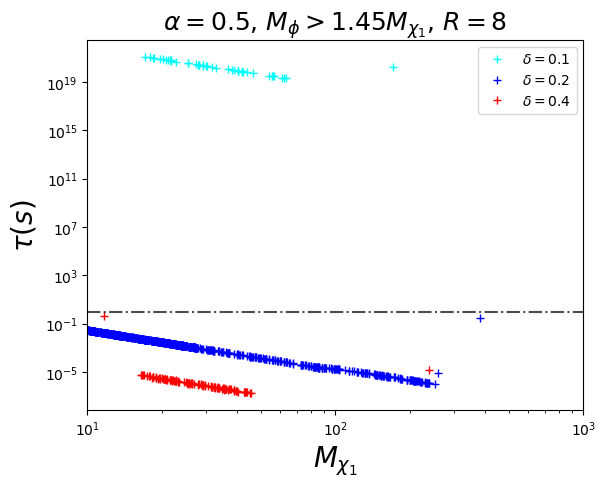

In [260]:
plt.figure()
plt.title(r'$\alpha = 0.5 \text{, } M_{\phi} > 1.45 M_{\chi_{1}} \text{, } R=8$', size=18)
#plt.plot(ydata1.Mx1, ydata1.life_time,'.',color='blue',label=r'$\delta = 0.01$')
#plt.plot(ydata1_1.Mx1, ydata1_1.life_time, '.', color='black')
#plt.plot(ydata2.Mx1, ydata2.life_time,'.',color='red',label=r'$\delta = 0.05$')
#plt.plot(ydata2_1.Mx1, ydata2_1.life_time, '.', color='black')
plt.plot(ydata3.Mx1, ydata3.life_time,'+',color='cyan',label=r'$\delta = 0.1$')
plt.plot(ydata3_1.Mx1, ydata3_1.life_time, '.', color='black')
plt.plot(ydata4.Mx1*1e3, ydata4.life_time,'+',color='blue',label=r'$\delta = 0.2$')
plt.plot(ydata5.Mx1*1e3, ydata5.life_time,'+',color='red', label=r'$\delta = 0.4$')
plt.xscale('log')
plt.yscale('log')
plt.axhline(y=1, color='black', linestyle='-.', alpha=0.7)
plt.xlim(10,1000)
plt.xlabel(r'$M_{\chi_{1}}$',size=20)
plt.ylabel(r'$\tau (s)$',size=20)
plt.legend()
plt.show()

In [236]:
plt.figure(figsize=(10, 8))

scatter = plt.scatter(df_canales_0p2_r2.Mx1 * 1e3, 
                     df_canales_0p2_r2.epsilon**2, 
                     c=df_canales_0p2_r2.contrib_chi1_chi1,
                     cmap='winter', 
                     alpha=0.7, 
                     s=50)  # s = tamaño de los puntos

plt.plot(limite_Delta0p05_alpha0p5.MAp / 8 * 1e3, limite_Delta0p05_alpha0p5.epsilon2, 
         '-', color='black', markersize=6, alpha=0.7)
plt.plot(limite_babar.MAp / 8 *1e3, limite_babar.epsilon**2, '-',color='gray')
plt.fill_between(limite_babar.MAp / 8 * 1e3, 
                 limite_babar.epsilon**2, 
                 1,  # Límite inferior (eje x)
                 color='gray', 
                 alpha=0.3,
                 hatch='\\\\',
                 edgecolor='gray',
                 linewidth=0.5)
plt.text(20, 1e-6, 'BaBar', size=15)
plt.text(20, 1e-7, 'DUNE', size=15, rotation=35)
plt.colorbar(scatter, label=r'aniquilación $\chi_{1} + \chi_{1}$')
elementos_graficos(r'$M_{\chi_{1}}$ (MeV)',r'$\epsilon^2$')
plt.title(r'Sensitividad de los canales $\delta = 0.2 \text{, } \alpha = 0.5$', size=20)
plt.ylim(1e-10,1e-4)
plt.xlim(10,200)
plt.legend()
plt.show()

NameError: name 'df_canales_0p2_r2' is not defined

In [36]:
plt.figure(figsize=(10, 8))

scatter = plt.scatter(df_canales_0p4_r2.Mx1 * 1e3, 
                     df_canales_0p4_r2.epsilon**2, 
                     c=df_canales_0p4_r2.contrib_chi1_chi1,
                     cmap='winter', 
                     alpha=0.7, 
                     s=50)  # s = tamaño de los puntos

plt.plot(limite_Delta0p05_alpha0p5.MAp / 8 * 1e3, limite_Delta0p05_alpha0p5.epsilon2, 
         '-', color='black', markersize=6, alpha=0.7)
plt.plot(limite_babar.MAp / 8 *1e3, limite_babar.epsilon**2, '-',color='gray')
plt.fill_between(limite_babar.MAp / 8 * 1e3, 
                 limite_babar.epsilon**2, 
                 1,  # Límite inferior (eje x)
                 color='gray', 
                 alpha=0.3,
                 hatch='\\\\',
                 edgecolor='gray',
                 linewidth=0.5)
plt.text(20, 1e-6, 'BaBar', size=15)
plt.text(20, 1e-7, 'DUNE', size=15, rotation=35)
plt.colorbar(scatter, label=r'aniquilación $\chi_{1} + \chi_{1}$')
elementos_graficos(r'$M_{\chi_{1}}$ (MeV)',r'$\epsilon^2$')
plt.title(r'Sensitividad de los canales $\delta = 0.4 \text{, } \alpha = 0.5$', size=20)
plt.ylim(1e-10,1e-4)
plt.xlim(10,200)
plt.legend()
plt.show()

NameError: name 'df_canales_0p4_r2' is not defined

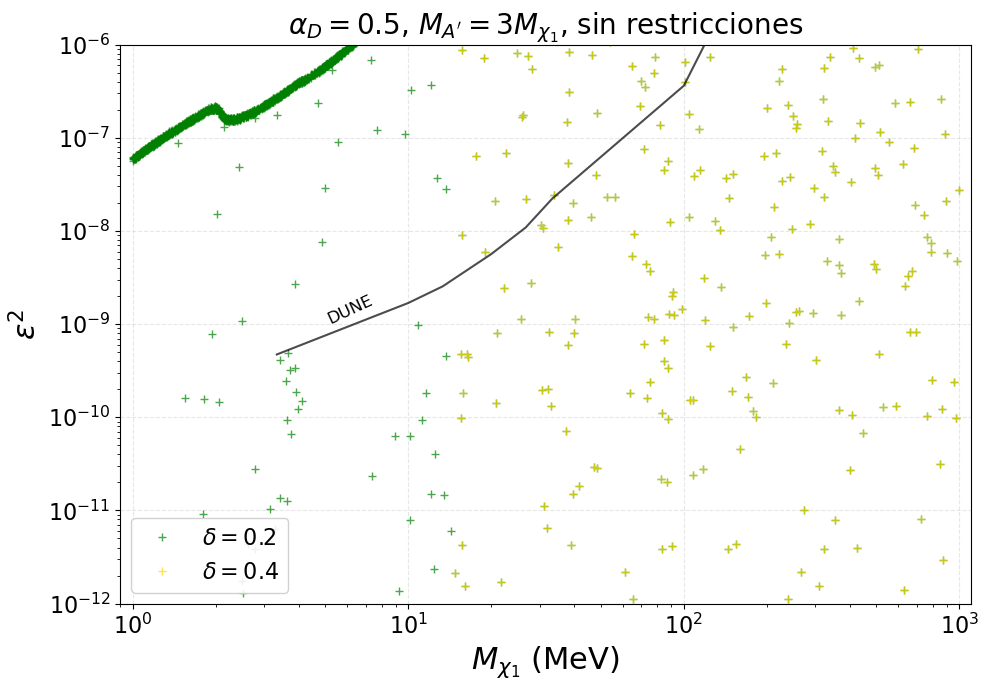

In [135]:
#limite_Delta0p05_alpha0p5

plt.figure(figsize=(10, 7))
#------------------------------------------------------------------------------------
plt.plot(df_omega_0p4_R8_0p5_n2_g.Mchi1*1e3, df_omega_0p4_R8_0p5_n2_g.epsilon**2, 
         '+', color='green', markersize=6, alpha=0.7, label=r'$\delta = 0.2$')
plt.plot(df_canales_0p4_r2.Mx1*1e3, df_canales_0p4_r2.epsilon**2, 
         '+', color='gold', markersize=6, alpha=0.7, label=r'$\delta = 0.4$')
plt.plot(limite_Delta0p05_alpha0p5.MAp / 3 * 1e3, limite_Delta0p05_alpha0p5.epsilon2, 
         '-', color='black', markersize=6, alpha=0.7)
#------------------------------------------------------------------------------------
elementos_graficos(r'$M_{\chi_{1}}$ (MeV)',r'$\epsilon^2$')
plt.title(r'$\alpha_{D} = 0.5$, $M_{A^{\prime}} = 3 M_{\chi_{1}}$, sin restricciones', size=20)
plt.tight_layout()
plt.legend(fontsize=16, framealpha=0.9, loc=0)
plt.text(5, 1e-9, r'DUNE', fontsize=12, color='black', rotation=25)
plt.savefig(f'{pathImagenes}alpha0p5_R3_sin_restricciones.jpg', dpi=300)
plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_25546/3217656267.py:5: SyntaxWarning: invalid escape sequence '\d'
  '''


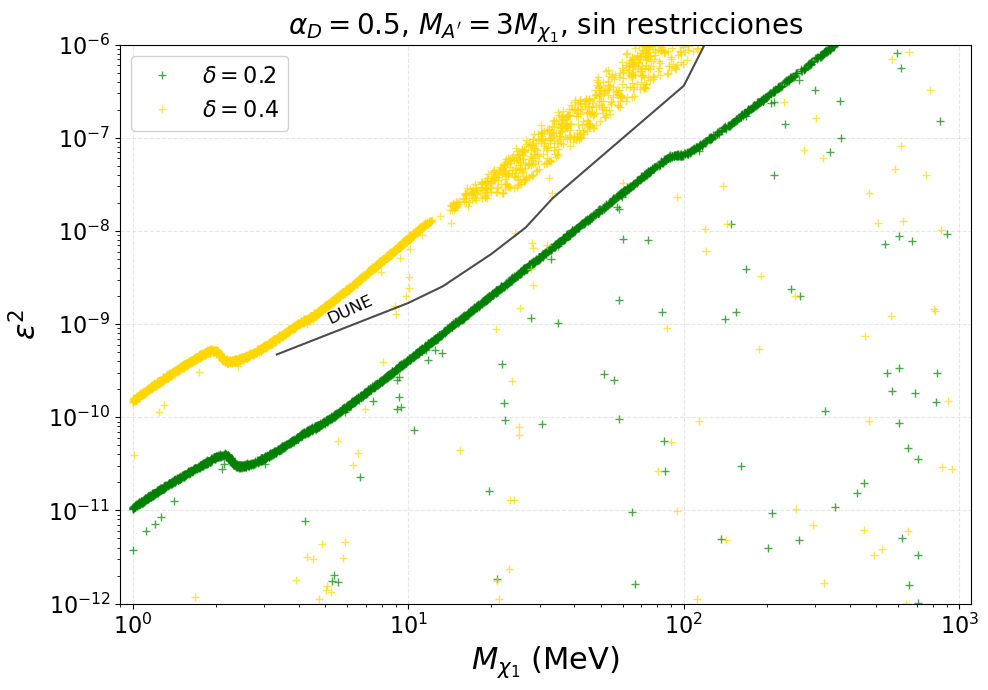

In [129]:
#limite_Delta0p05_alpha0p5

plt.figure(figsize=(10, 7))
#------------------------------------------------------------------------------------
'''
plt.plot(df_omega_0p01_R3_0p5.Mx1, df_omega_0p01_R3_0p5.epsilon**2, 
         '.', color='blue', markersize=6, alpha=0.7, label=r'$\delta = 0.01$')
plt.plot(df_omega_0p05_R3_0p5.Mx1, df_omega_0p05_R3_0p5.epsilon**2, 
         '*', color='red', markersize=6, alpha=0.7, label=r'$\delta = 0.05$')
plt.plot(df_omega_0p1_R3_0p5.Mx1, df_omega_0p1_R3_0p5.epsilon**2, 
         '+', color='cyan', markersize=6, alpha=0.7, label=r'$\delta = 0.1$')
         '''
plt.plot(df_omega_0p2_R3_0p5.Mx1, df_omega_0p2_R3_0p5.epsilon**2, 
         '+', color='green', markersize=6, alpha=0.7, label=r'$\delta = 0.2$')
plt.plot(df_omega_0p4_R3_0p5.Mx1, df_omega_0p4_R3_0p5.epsilon**2, 
         '+', color='gold', markersize=6, alpha=0.7, label=r'$\delta = 0.4$')
plt.plot(limite_Delta0p05_alpha0p5.MAp / 3 * 1e3, limite_Delta0p05_alpha0p5.epsilon2, 
         '-', color='black', markersize=6, alpha=0.7)
#------------------------------------------------------------------------------------
elementos_graficos(r'$M_{\chi_{1}}$ (MeV)',r'$\epsilon^2$')
plt.title(r'$\alpha_{D} = 0.5$, $M_{A^{\prime}} = 3 M_{\chi_{1}}$, sin restricciones', size=20)
plt.tight_layout()
plt.legend(fontsize=16, framealpha=0.9, loc=0)
plt.text(5, 1e-9, r'DUNE', fontsize=12, color='black', rotation=25)
plt.savefig(f'{pathImagenes}alpha0p5_R3_sin_restricciones.jpg', dpi=300)
plt.show()

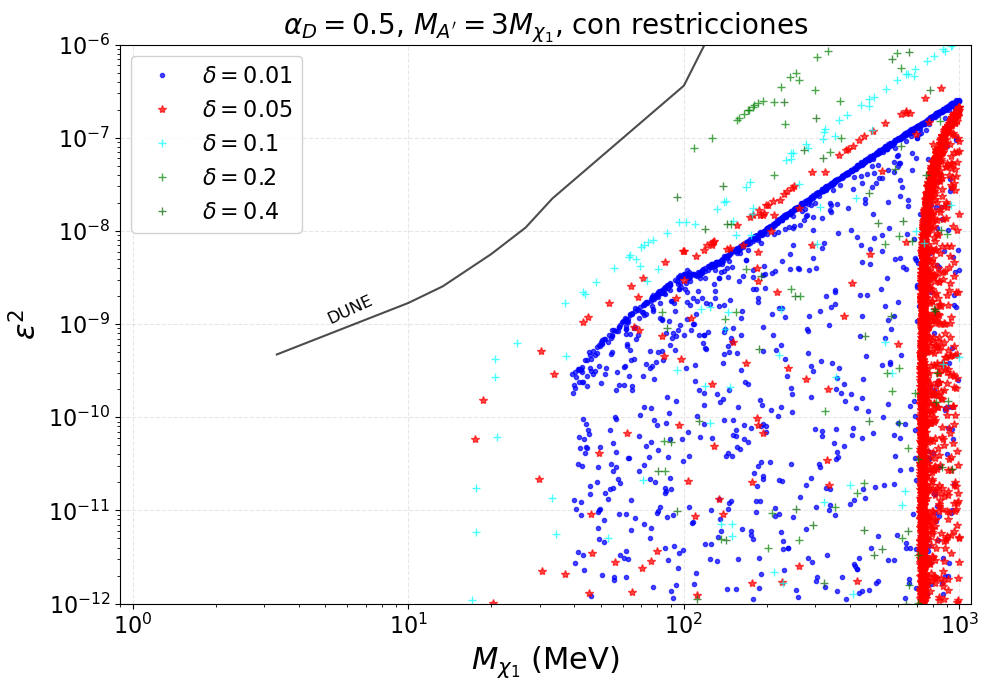

In [155]:
#limite_Delta0p05_alpha0p5

plt.figure(figsize=(10, 7))
#------------------------------------------------------------------------------------
plt.plot(df_omega_0p01_R3_0p5_3.Mx1, df_omega_0p01_R3_0p5_3.epsilon**2, 
         '.', color='blue', markersize=6, alpha=0.7, label=r'$\delta = 0.01$')
plt.plot(df_omega_0p05_R3_0p5_3.Mx1, df_omega_0p05_R3_0p5_3.epsilon**2, 
         '*', color='red', markersize=6, alpha=0.7, label=r'$\delta = 0.05$')
plt.plot(df_omega_0p1_R3_0p5_3.Mx1, df_omega_0p1_R3_0p5_3.epsilon**2, 
         '+', color='cyan', markersize=6, alpha=0.7, label=r'$\delta = 0.1$')
plt.plot(df_omega_0p2_R3_0p5_3.Mx1, df_omega_0p2_R3_0p5_3.epsilon**2, 
         '+', color='green', markersize=6, alpha=0.7, label=r'$\delta = 0.2$')
plt.plot(df_omega_0p4_R3_0p5_3.Mx1, df_omega_0p4_R3_0p5_3.epsilon**2, 
         '+', color='darkgreen', markersize=6, alpha=0.7, label=r'$\delta = 0.4$')
plt.plot(limite_Delta0p05_alpha0p5.MAp / 3 * 1e3, limite_Delta0p05_alpha0p5.epsilon2, 
         '-', color='black', markersize=6, alpha=0.7)
#------------------------------------------------------------------------------------
elementos_graficos(r'$M_{\chi_{1}}$ (MeV)',r'$\epsilon^2$')
plt.title(r'$\alpha_{D} = 0.5$, $M_{A^{\prime}} = 3 M_{\chi_{1}}$, con restricciones', size=20)
plt.tight_layout()
plt.legend(fontsize=16, framealpha=0.9, loc=0)
plt.text(5, 1e-9, r'DUNE', fontsize=12, color='black', rotation=25)
plt.savefig(f'{pathImagenes}alpha0p5_R3_sin_restricciones.jpg', dpi=300)
plt.show()

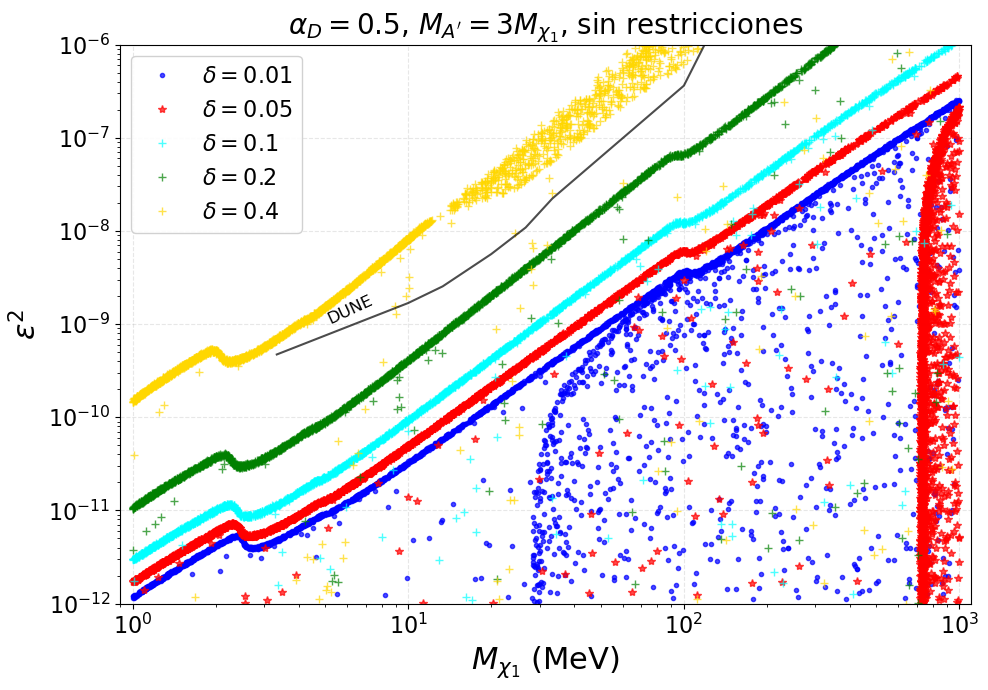

In [156]:
#limite_Delta0p05_alpha0p5

plt.figure(figsize=(10, 7))
#------------------------------------------------------------------------------------
plt.plot(df_omega_0p01_R3_0p5.Mx1, df_omega_0p01_R3_0p5.epsilon**2, 
         '.', color='blue', markersize=6, alpha=0.7, label=r'$\delta = 0.01$')
plt.plot(df_omega_0p05_R3_0p5.Mx1, df_omega_0p05_R3_0p5.epsilon**2, 
         '*', color='red', markersize=6, alpha=0.7, label=r'$\delta = 0.05$')
plt.plot(df_omega_0p1_R3_0p5.Mx1, df_omega_0p1_R3_0p5.epsilon**2, 
         '+', color='cyan', markersize=6, alpha=0.7, label=r'$\delta = 0.1$')
plt.plot(df_omega_0p2_R3_0p5.Mx1, df_omega_0p2_R3_0p5.epsilon**2, 
         '+', color='green', markersize=6, alpha=0.7, label=r'$\delta = 0.2$')
plt.plot(df_omega_0p4_R3_0p5.Mx1, df_omega_0p4_R3_0p5.epsilon**2, 
         '+', color='gold', markersize=6, alpha=0.7, label=r'$\delta = 0.4$')
plt.plot(limite_Delta0p05_alpha0p5.MAp / 3 * 1e3, limite_Delta0p05_alpha0p5.epsilon2, 
         '-', color='black', markersize=6, alpha=0.7)
#------------------------------------------------------------------------------------
elementos_graficos(r'$M_{\chi_{1}}$ (MeV)',r'$\epsilon^2$')
plt.title(r'$\alpha_{D} = 0.5$, $M_{A^{\prime}} = 3 M_{\chi_{1}}$, sin restricciones', size=20)
plt.tight_layout()
plt.legend(fontsize=16, framealpha=0.9, loc=0)
plt.text(5, 1e-9, r'DUNE', fontsize=12, color='black', rotation=25)
plt.savefig(f'{pathImagenes}alpha0p5_R3_sin_restricciones.jpg', dpi=300)
plt.show()

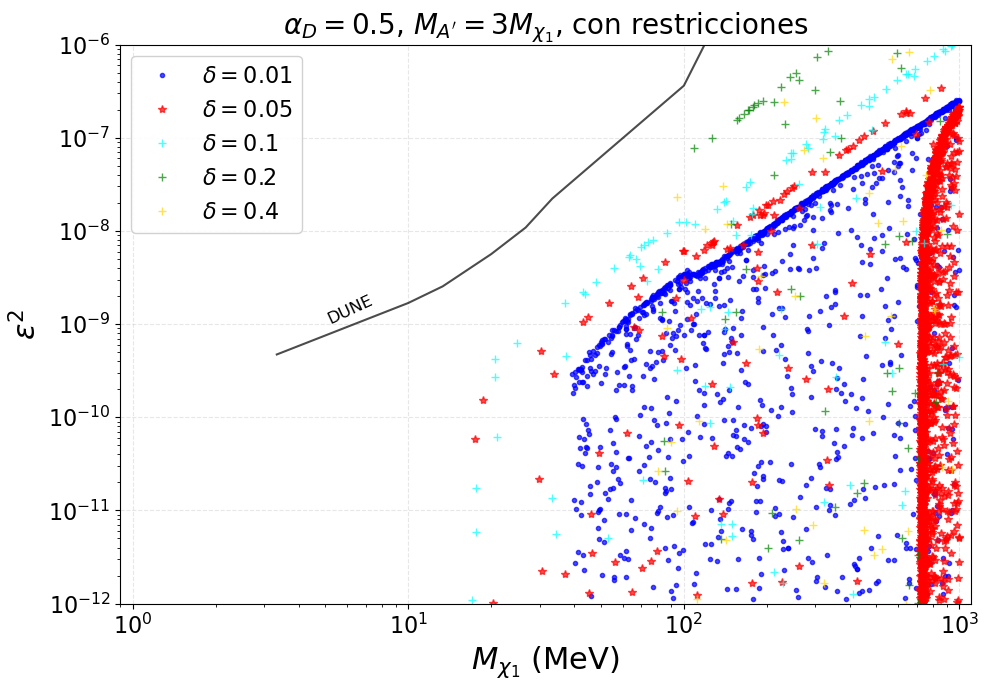

In [157]:
#limite_Delta0p05_alpha0p5

plt.figure(figsize=(10, 7))
#------------------------------------------------------------------------------------
plt.plot(df_omega_0p01_R3_0p5_3.Mx1, df_omega_0p01_R3_0p5_3.epsilon**2, 
         '.', color='blue', markersize=6, alpha=0.7, label=r'$\delta = 0.01$')
plt.plot(df_omega_0p05_R3_0p5_3.Mx1, df_omega_0p05_R3_0p5_3.epsilon**2, 
         '*', color='red', markersize=6, alpha=0.7, label=r'$\delta = 0.05$')
plt.plot(df_omega_0p1_R3_0p5_3.Mx1, df_omega_0p1_R3_0p5_3.epsilon**2, 
         '+', color='cyan', markersize=6, alpha=0.7, label=r'$\delta = 0.1$')
plt.plot(df_omega_0p2_R3_0p5_3.Mx1, df_omega_0p2_R3_0p5_3.epsilon**2, 
         '+', color='green', markersize=6, alpha=0.7, label=r'$\delta = 0.2$')
plt.plot(df_omega_0p4_R3_0p5_3.Mx1, df_omega_0p4_R3_0p5_3.epsilon**2, 
         '+', color='gold', markersize=6, alpha=0.7, label=r'$\delta = 0.4$')
plt.plot(limite_Delta0p05_alpha0p5.MAp / 3 * 1e3, limite_Delta0p05_alpha0p5.epsilon2, 
         '-', color='black', markersize=6, alpha=0.7)
#------------------------------------------------------------------------------------
elementos_graficos(r'$M_{\chi_{1}}$ (MeV)',r'$\epsilon^2$')
plt.title(r'$\alpha_{D} = 0.5$, $M_{A^{\prime}} = 3 M_{\chi_{1}}$, con restricciones', size=20)
plt.tight_layout()
plt.legend(fontsize=16, framealpha=0.9, loc=0)
plt.text(5, 1e-9, r'DUNE', fontsize=12, color='black', rotation=25) 
plt.savefig(f'{pathImagenes}alpha0p5_R3_con_restricciones.jpg', dpi=300)
plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_8259/1104421260.py:5: SyntaxWarning: invalid escape sequence '\d'
  '''


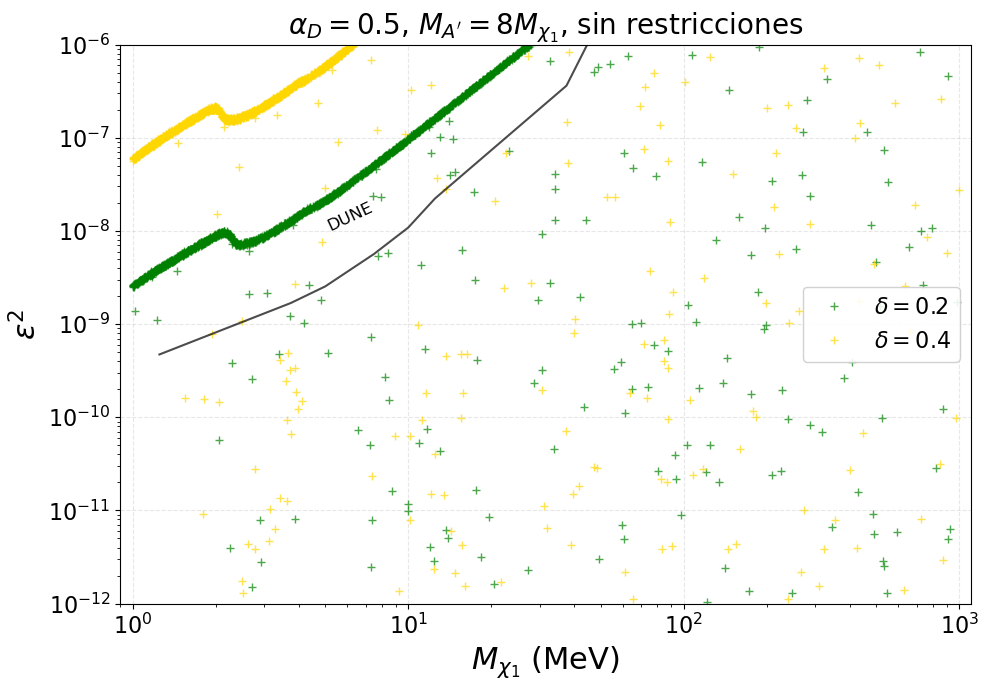

In [170]:
#limite_Delta0p05_alpha0p5

plt.figure(figsize=(10, 7))
#------------------------------------------------------------------------------------
'''
plt.plot(df_omega_0p01_R8_0p5.Mx1, df_omega_0p01_R8_0p5.epsilon**2, 
         '.', color='blue', markersize=6, alpha=0.7, label=r'$\delta = 0.01$')
plt.plot(df_omega_0p05_R8_0p5.Mx1, df_omega_0p05_R8_0p5.epsilon**2, 
         '*', color='red', markersize=6, alpha=0.7, label=r'$\delta = 0.05$')
plt.plot(df_omega_0p1_R8_0p5.Mx1, df_omega_0p1_R8_0p5.epsilon**2, 
         '+', color='cyan', markersize=6, alpha=0.7, label=r'$\delta = 0.1$')
         '''
plt.plot(df_omega_0p2_R8_0p5.Mx1, df_omega_0p2_R8_0p5.epsilon**2, 
         '+', color='green', markersize=6, alpha=0.7, label=r'$\delta = 0.2$')
plt.plot(df_omega_0p4_R8_0p5.Mx1, df_omega_0p4_R8_0p5.epsilon**2, 
         '+', color='gold', markersize=6, alpha=0.7, label=r'$\delta = 0.4$')
plt.plot(limite_Delta0p05_alpha0p5.MAp / 8 * 1e3, limite_Delta0p05_alpha0p5.epsilon2, 
         '-', color='black', markersize=6, alpha=0.7)
#------------------------------------------------------------------------------------
elementos_graficos(r'$M_{\chi_{1}}$ (MeV)',r'$\epsilon^2$')
plt.title(r'$\alpha_{D} = 0.5$, $M_{A^{\prime}} = 8 M_{\chi_{1}}$, sin restricciones', size=20)
plt.tight_layout()
plt.legend(fontsize=16, framealpha=0.9, loc=0)
plt.text(5, 1e-8, r'DUNE', fontsize=12, color='black', rotation=25) 
plt.savefig(f'{pathImagenes}alpha0p5_R8_sin_restricciones.jpg', dpi=300)
plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_8259/633708915.py:5: SyntaxWarning: invalid escape sequence '\d'
  '''


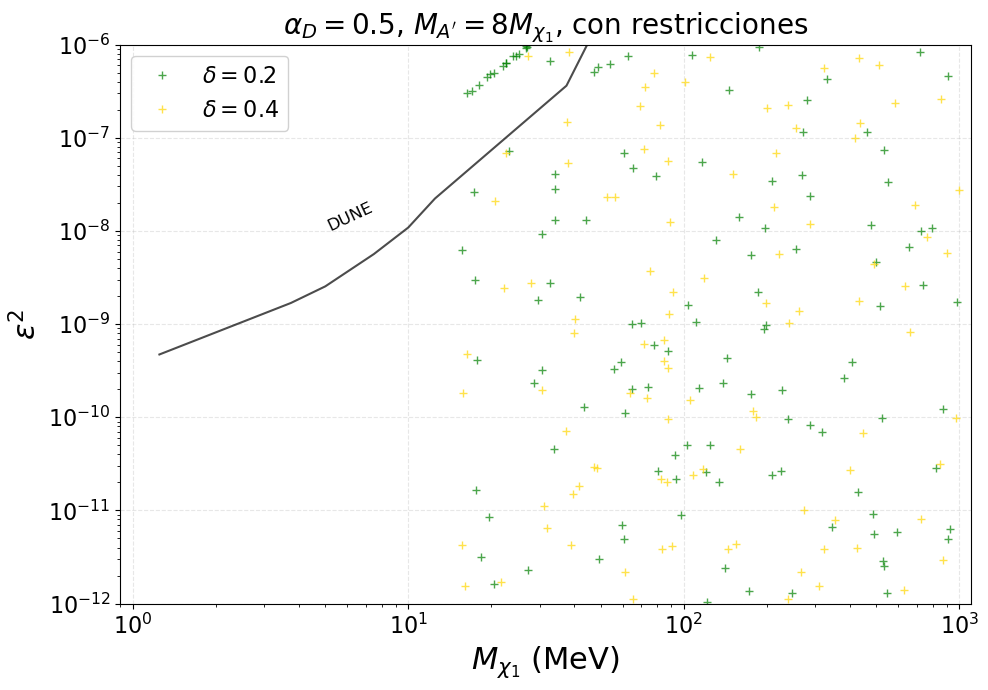

In [171]:
#limite_Delta0p05_alpha0p5

plt.figure(figsize=(10, 7))
#------------------------------------------------------------------------------------
'''
plt.plot(df_omega_0p01_R8_0p5_2.Mx1, df_omega_0p01_R8_0p5_2.epsilon**2, 
         '.', color='blue', markersize=6, alpha=0.7, label=r'$\delta = 0.01$')
plt.plot(df_omega_0p05_R8_0p5_2.Mx1, df_omega_0p05_R8_0p5_2.epsilon**2, 
         '*', color='red', markersize=6, alpha=0.7, label=r'$\delta = 0.05$')
plt.plot(df_omega_0p1_R8_0p5_2.Mx1, df_omega_0p1_R8_0p5_2.epsilon**2, 
         '+', color='cyan', markersize=6, alpha=0.7, label=r'$\delta = 0.1$')
         '''
plt.plot(df_omega_0p2_R8_0p5_2.Mx1, df_omega_0p2_R8_0p5_2.epsilon**2, 
         '+', color='green', markersize=6, alpha=0.7, label=r'$\delta = 0.2$')
plt.plot(df_omega_0p4_R8_0p5_2.Mx1, df_omega_0p4_R8_0p5_2.epsilon**2, 
         '+', color='gold', markersize=6, alpha=0.7, label=r'$\delta = 0.4$')
plt.plot(limite_Delta0p05_alpha0p5.MAp / 8 * 1e3, limite_Delta0p05_alpha0p5.epsilon2, 
         '-', color='black', markersize=6, alpha=0.7)
#------------------------------------------------------------------------------------
elementos_graficos(r'$M_{\chi_{1}}$ (MeV)',r'$\epsilon^2$')
plt.title(r'$\alpha_{D} = 0.5$, $M_{A^{\prime}} = 8 M_{\chi_{1}}$, con restricciones', size=20)
plt.tight_layout()
plt.legend(fontsize=16, framealpha=0.9, loc=0)
plt.text(5, 1e-8, r'DUNE', fontsize=12, color='black', rotation=25) 
plt.savefig(f'{pathImagenes}alpha0p5_R8_con_restricciones.jpg', dpi=300)
plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_8259/2537104504.py:5: SyntaxWarning: invalid escape sequence '\d'
  '''


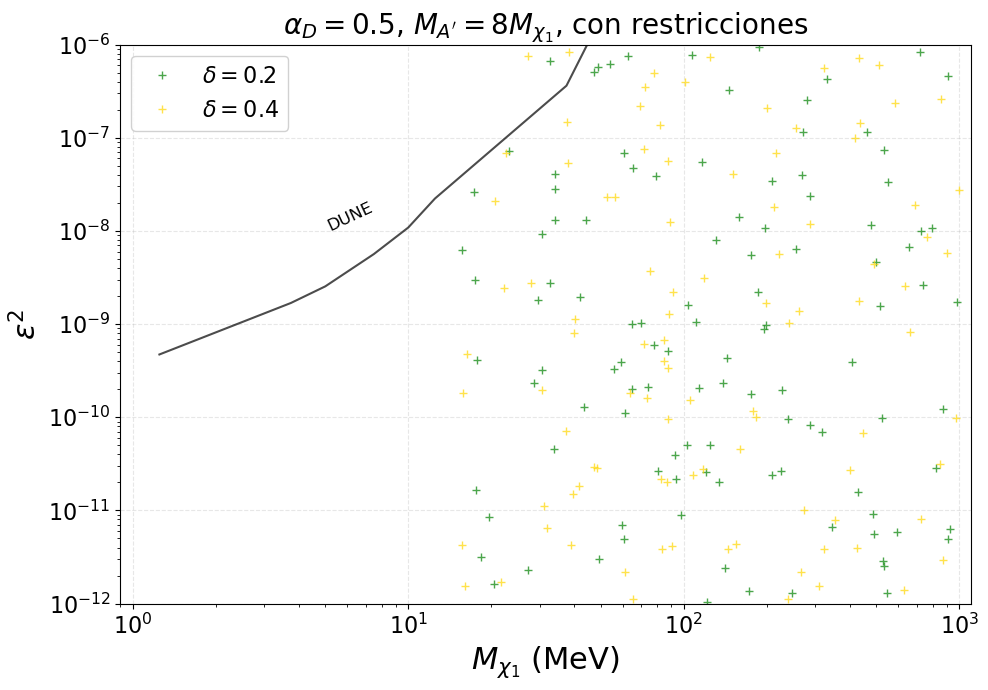

In [172]:
#limite_Delta0p05_alpha0p5

plt.figure(figsize=(10, 7))
#------------------------------------------------------------------------------------
'''
plt.plot(df_omega_0p01_R8_0p5_3.Mx1, df_omega_0p01_R8_0p5_3.epsilon**2, 
         '.', color='blue', markersize=6, alpha=0.7, label=r'$\delta = 0.01$')
plt.plot(df_omega_0p05_R8_0p5_3.Mx1, df_omega_0p05_R8_0p5_3.epsilon**2, 
         '*', color='red', markersize=6, alpha=0.7, label=r'$\delta = 0.05$')
plt.plot(df_omega_0p1_R8_0p5_3.Mx1, df_omega_0p1_R8_0p5_3.epsilon**2, 
         '+', color='cyan', markersize=6, alpha=0.7, label=r'$\delta = 0.1$')
         '''
plt.plot(df_omega_0p2_R8_0p5_3.Mx1, df_omega_0p2_R8_0p5_3.epsilon**2, 
         '+', color='green', markersize=6, alpha=0.7, label=r'$\delta = 0.2$')
plt.plot(df_omega_0p4_R8_0p5_3.Mx1, df_omega_0p4_R8_0p5_3.epsilon**2, 
         '+', color='gold', markersize=6, alpha=0.7, label=r'$\delta = 0.4$')
plt.plot(limite_Delta0p05_alpha0p5.MAp / 8 * 1e3, limite_Delta0p05_alpha0p5.epsilon2, 
         '-', color='black', markersize=6, alpha=0.7)
#------------------------------------------------------------------------------------
elementos_graficos(r'$M_{\chi_{1}}$ (MeV)',r'$\epsilon^2$')
plt.title(r'$\alpha_{D} = 0.5$, $M_{A^{\prime}} = 8 M_{\chi_{1}}$, con restricciones', size=20)
plt.tight_layout()
plt.legend(fontsize=16, framealpha=0.9, loc=0)
plt.text(5, 1e-8, r'DUNE', fontsize=12, color='black', rotation=25) 
plt.savefig(f'{pathImagenes}alpha0p5_R8_con_restricciones.jpg', dpi=300)
plt.show()

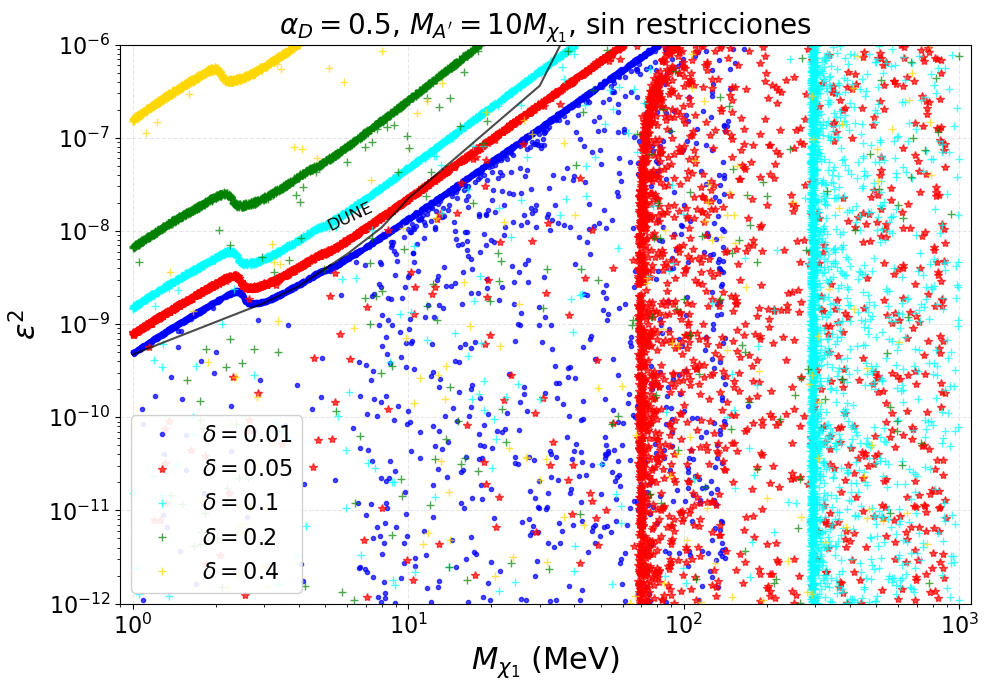

In [97]:
#limite_Delta0p05_alpha0p5

plt.figure(figsize=(10, 7))
#------------------------------------------------------------------------------------
plt.plot(df_omega_0p01_R10_0p5.Mx1, df_omega_0p01_R10_0p5.epsilon**2, 
         '.', color='blue', markersize=6, alpha=0.7, label=r'$\delta = 0.01$')
plt.plot(df_omega_0p05_R10_0p5.Mx1, df_omega_0p05_R10_0p5.epsilon**2, 
         '*', color='red', markersize=6, alpha=0.7, label=r'$\delta = 0.05$')
plt.plot(df_omega_0p1_R10_0p5.Mx1, df_omega_0p1_R10_0p5.epsilon**2, 
         '+', color='cyan', markersize=6, alpha=0.7, label=r'$\delta = 0.1$')
plt.plot(df_omega_0p2_R10_0p5.Mx1, df_omega_0p2_R10_0p5.epsilon**2, 
         '+', color='green', markersize=6, alpha=0.7, label=r'$\delta = 0.2$')
plt.plot(df_omega_0p4_R10_0p5.Mx1, df_omega_0p4_R10_0p5.epsilon**2, 
         '+', color='gold', markersize=6, alpha=0.7, label=r'$\delta = 0.4$')
plt.plot(limite_Delta0p05_alpha0p5.MAp / 10 * 1e3, limite_Delta0p05_alpha0p5.epsilon2, 
         '-', color='black', markersize=6, alpha=0.7)
#------------------------------------------------------------------------------------
elementos_graficos(r'$M_{\chi_{1}}$ (MeV)',r'$\epsilon^2$')
plt.title(r'$\alpha_{D} = 0.5$, $M_{A^{\prime}} = 10 M_{\chi_{1}}$, sin restricciones', size=20)
plt.tight_layout()
plt.legend(fontsize=16, framealpha=0.9, loc=0)
plt.text(5, 1e-8, r'DUNE', fontsize=12, color='black', rotation=25) 
plt.savefig(f'{pathImagenes}alpha0p5_R10_sin_restricciones.jpg', dpi=300)
plt.show()

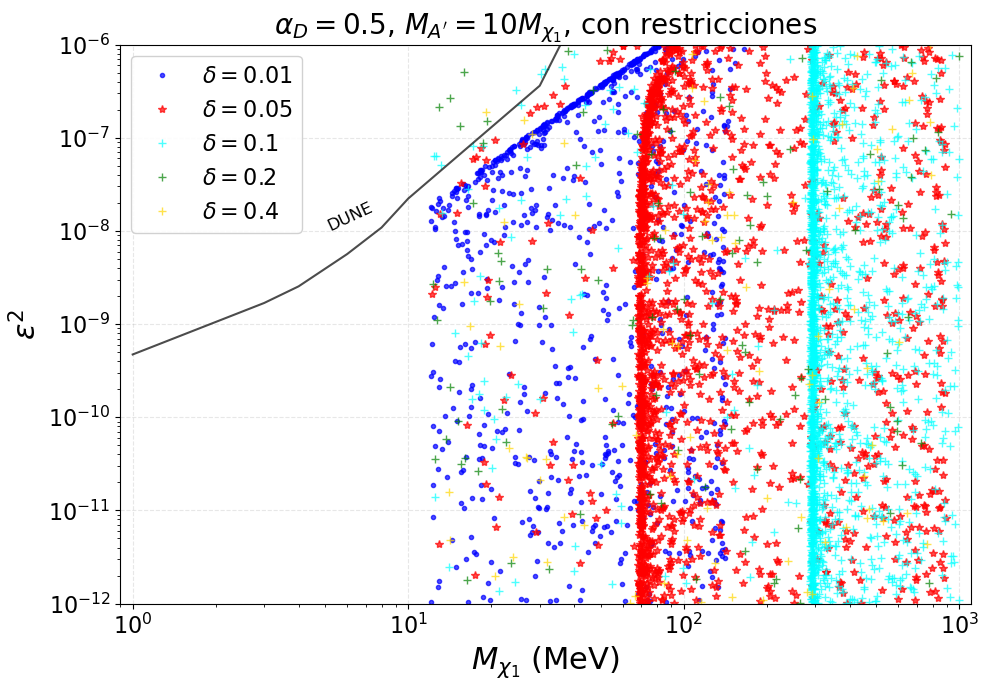

In [58]:
plt.figure(figsize=(10, 7))
#------------------------------------------------------------------------------------
plt.plot(df_omega_0p01_R10_0p5_3.Mx1, df_omega_0p01_R10_0p5_3.epsilon**2, 
         '.', color='blue', markersize=6, alpha=0.7, label=r'$\delta = 0.01$')
plt.plot(df_omega_0p05_R10_0p5_3.Mx1, df_omega_0p05_R10_0p5_3.epsilon**2, 
         '*', color='red', markersize=6, alpha=0.7, label=r'$\delta = 0.05$')
plt.plot(df_omega_0p1_R10_0p5_3.Mx1, df_omega_0p1_R10_0p5_3.epsilon**2, 
         '+', color='cyan', markersize=6, alpha=0.7, label=r'$\delta = 0.1$')
plt.plot(df_omega_0p2_R10_0p5_3.Mx1, df_omega_0p2_R10_0p5_3.epsilon**2, 
         '+', color='green', markersize=6, alpha=0.7, label=r'$\delta = 0.2$')
plt.plot(df_omega_0p4_R10_0p5_3.Mx1, df_omega_0p4_R10_0p5_3.epsilon**2, 
         '+', color='gold', markersize=6, alpha=0.7, label=r'$\delta = 0.4$')
plt.plot(limite_Delta0p05_alpha0p5.MAp / 10 * 1e3, limite_Delta0p05_alpha0p5.epsilon2, 
         '-', color='black', markersize=6, alpha=0.7)
#------------------------------------------------------------------------------------
elementos_graficos(r'$M_{\chi_{1}}$ (MeV)',r'$\epsilon^2$')
plt.title(r'$\alpha_{D} = 0.5$, $M_{A^{\prime}} = 10 M_{\chi_{1}}$, con restricciones', size=20)
plt.tight_layout()
plt.legend(fontsize=16, framealpha=0.9, loc=0)
plt.text(5, 1e-8, r'DUNE', fontsize=12, color='black', rotation=25) 
plt.savefig(f'{pathImagenes}alpha0p5_R10_con_restricciones.jpg', dpi=300)
plt.show()

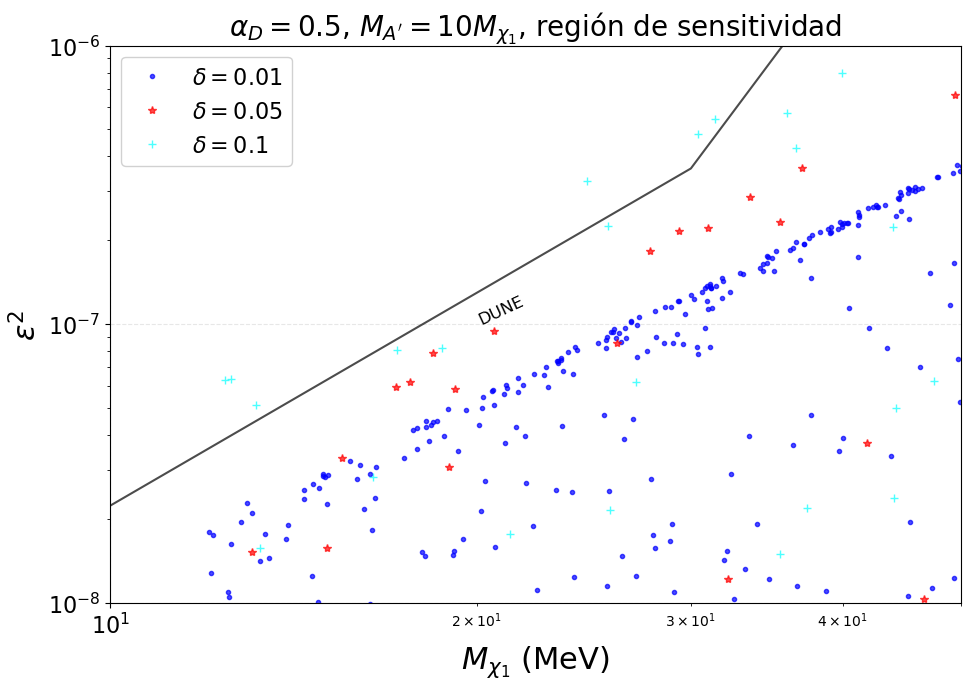

In [53]:
#limite_Delta0p05_alpha0p5

plt.figure(figsize=(10, 7))
#------------------------------------------------------------------------------------
plt.plot(df_omega_0p01_R10_0p5_3.Mx1, df_omega_0p01_R10_0p5_3.epsilon**2, 
         '.', color='blue', markersize=6, alpha=0.7, label=r'$\delta = 0.01$')
plt.plot(df_omega_0p05_R10_0p5_3.Mx1, df_omega_0p05_R10_0p5_3.epsilon**2, 
         '*', color='red', markersize=6, alpha=0.7, label=r'$\delta = 0.05$')
plt.plot(df_omega_0p1_R10_0p5_3.Mx1, df_omega_0p1_R10_0p5_3.epsilon**2, 
         '+', color='cyan', markersize=6, alpha=0.7, label=r'$\delta = 0.1$')
plt.plot(limite_Delta0p05_alpha0p5.MAp / 10 * 1e3, limite_Delta0p05_alpha0p5.epsilon2, 
         '-', color='black', markersize=6, alpha=0.7)
#------------------------------------------------------------------------------------
elementos_graficos(r'$M_{\chi_{1}}$ (MeV)',r'$\epsilon^2$')
plt.title(r'$\alpha_{D} = 0.5$, $M_{A^{\prime}} = 10 M_{\chi_{1}}$, región de sensitividad', size=20)
plt.tight_layout()
plt.legend(fontsize=16, framealpha=0.9, loc=0)
plt.text(20, 1e-7, r'DUNE', fontsize=12, color='black', rotation=25) 
plt.xlim(10,50)
plt.ylim(1e-8,1e-6)
#plt.xscale('linear')
plt.savefig(f'{pathImagenes}alpha0p5_R10_con_restricciones_zoom.jpg', dpi=300)
plt.show()

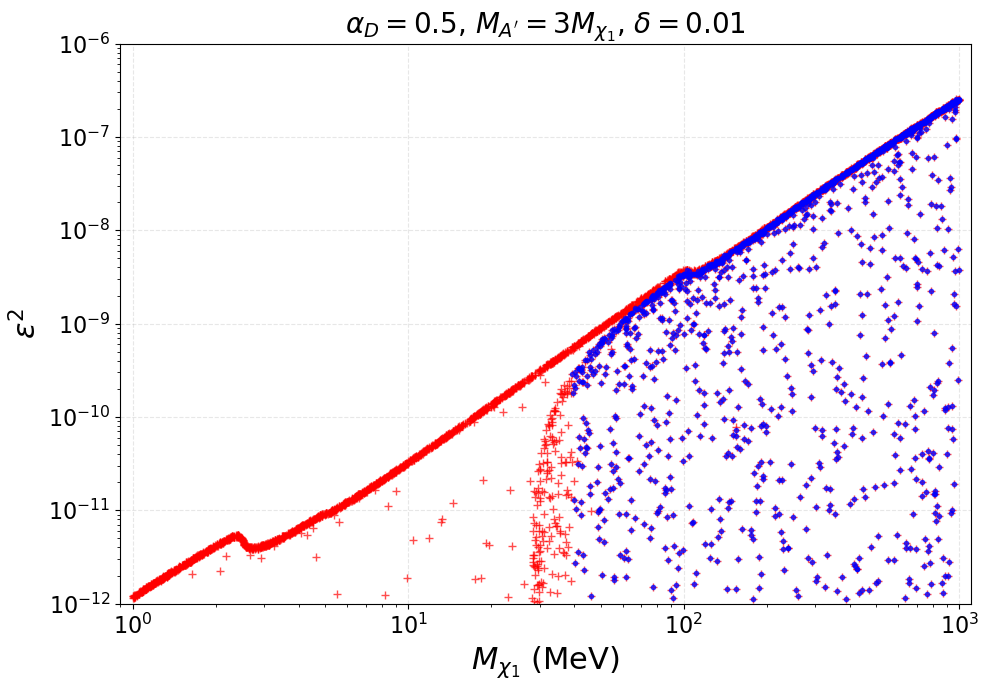

In [10]:
#limite_Delta0p05_alpha0p5

plt.figure(figsize=(10, 7))
#------------------------------------------------------------------------------------
plt.plot(df_omega_0p01_R3_0p5.Mx1, df_omega_0p01_R3_0p5.epsilon**2, 
         '+', color='red', markersize=6, alpha=0.7, label='Sin restricciones')
plt.plot(df_omega_0p01_R3_0p5_3.Mx1, df_omega_0p01_R3_0p5_3.epsilon**2, 
         '.',color='blue', markersize=6, alpha=0.7, label='Con restricciones')
#------------------------------------------------------------------------------------
# Configuración del gráfico
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\epsilon^2$', size=22)
plt.xlabel(r'$M_{\chi_{1}}$ (MeV)', size=22)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.legend(fontsize=16, framealpha=0.9, loc='best')
plt.xlim(0.9, 1100)
plt.ylim(1e-12, 1e-6)

# Título
plt.title(r'$\alpha_{D} = 0.5$, $M_{A^{\prime}} = 3 M_{\chi_{1}}$, $\delta = 0.01$', size=20)

# Mejorar el layout
plt.tight_layout()
plt.savefig(f'{pathImagenes}Delta0p01_alpha0p5_restricciones.jpg', dpi=300)
plt.show()

In [32]:
factor = (1/10)**4 * 0.5 
df_omega_0p01_R10_0p5['y'] = factor * df_omega_0p01_R10_0p5.epsilon**2
df_omega_0p05_R10_0p5['y'] = factor * df_omega_0p05_R10_0p5.epsilon**2
df_omega_0p1_R10_0p5['y'] = factor * df_omega_0p1_R10_0p5.epsilon**2

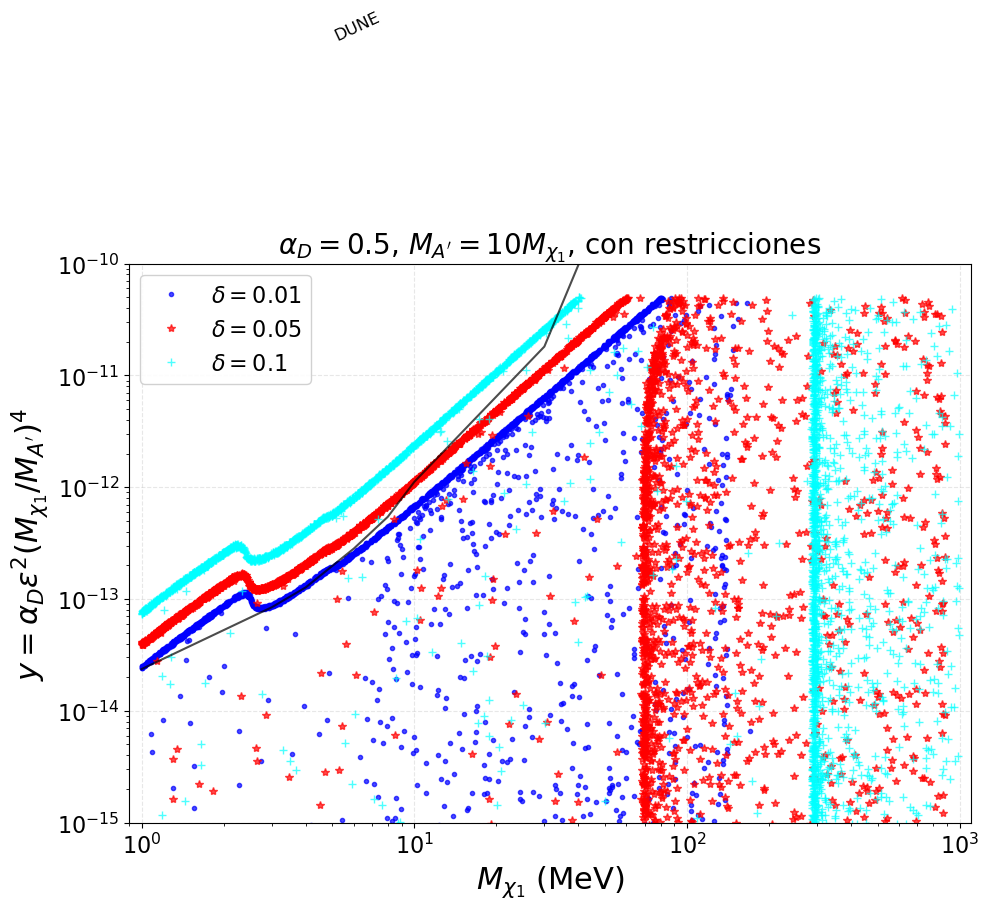

In [33]:
#limite_Delta0p05_alpha0p5

plt.figure(figsize=(10, 7))
#------------------------------------------------------------------------------------
plt.plot(df_omega_0p01_R10_0p5.Mx1, df_omega_0p01_R10_0p5.y, 
         '.', color='blue', markersize=6, alpha=0.7, label=r'$\delta = 0.01$')
plt.plot(df_omega_0p05_R10_0p5.Mx1, df_omega_0p05_R10_0p5.y, 
         '*', color='red', markersize=6, alpha=0.7, label=r'$\delta = 0.05$')
plt.plot(df_omega_0p1_R10_0p5.Mx1, df_omega_0p1_R10_0p5.y, 
         '+', color='cyan', markersize=6, alpha=0.7, label=r'$\delta = 0.1$')
plt.plot(limite_Delta0p05_alpha0p5.MAp / 10 * 1e3, limite_Delta0p05_alpha0p5.epsilon2 * factor, 
         '-', color='black', markersize=6, alpha=0.7)
#------------------------------------------------------------------------------------
elementos_graficos(r'$M_{\chi_{1}}$ (MeV)',r'$y = \alpha_{D} \epsilon^2 (M_{\chi_{1}} / M_{A^\prime})^4$')
plt.title(r'$\alpha_{D} = 0.5$, $M_{A^{\prime}} = 10 M_{\chi_{1}}$, con restricciones', size=20)
plt.tight_layout()
plt.legend(fontsize=16, framealpha=0.9, loc=0)
plt.ylim(1e-15,1e-10)
plt.text(5, 1e-8, r'DUNE', fontsize=12, color='black', rotation=25) 
#plt.savefig(f'{pathImagenes}alpha0p5_R10_con_restricciones.jpg', dpi=300)
plt.show()

In [34]:
path1 = r'limitesidms/delta0p1_alpha0p1/'
factor = (1/3)**4 * 0.1
limite_LSND_scatter_R3= pd.read_csv(f'{path1}LSND Scatter.csv',sep=';', names = ['Mx1', 'y'],decimal=',')
limite_LSND_scatter_R3['epsilon2'] = limite_LSND_scatter_R3['y'] / factor

In [35]:
path1 = r'limitesidms/r10/'
factor = (1/10)**4 * 0.1
limite_LSND_scatter_R10 = pd.read_csv(f'{path1}LSND Scatter R 10.csv',sep=';', names = ['Mx1', 'y'],decimal=',')
limite_LSND_scatter_R10['epsilon2'] = limite_LSND_scatter_R10['y'] / factor

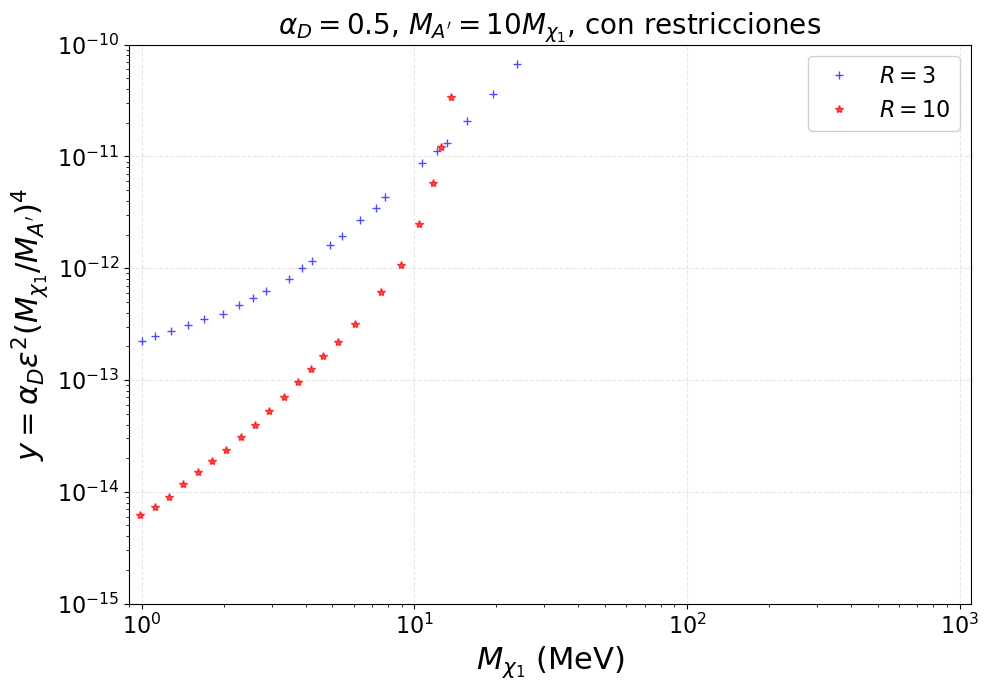

In [36]:
#limite_Delta0p05_alpha0p5

plt.figure(figsize=(10, 7))
#------------------------------------------------------------------------------------
plt.plot(limite_LSND_scatter_R3.Mx1, limite_LSND_scatter_R3.y, 
         '+', color='blue', markersize=6, alpha=0.7, label=r'$R = 3$')
plt.plot(limite_LSND_scatter_R10.Mx1, limite_LSND_scatter_R10.y, 
         '*', color='red', markersize=6, alpha=0.7, label=r'$R=10$')
#------------------------------------------------------------------------------------
elementos_graficos(r'$M_{\chi_{1}}$ (MeV)',r'$y = \alpha_{D} \epsilon^2 (M_{\chi_{1}} / M_{A^\prime})^4$')
plt.title(r'$\alpha_{D} = 0.5$, $M_{A^{\prime}} = 10 M_{\chi_{1}}$, con restricciones', size=20)
plt.tight_layout()
plt.legend(fontsize=16, framealpha=0.9, loc=0)
plt.ylim(1e-15,1e-10)
#plt.text(5, 1e-8, r'DUNE', fontsize=12, color='black', rotation=25) 
#plt.savefig(f'{pathImagenes}alpha0p5_R10_con_restricciones.jpg', dpi=300)
plt.show()

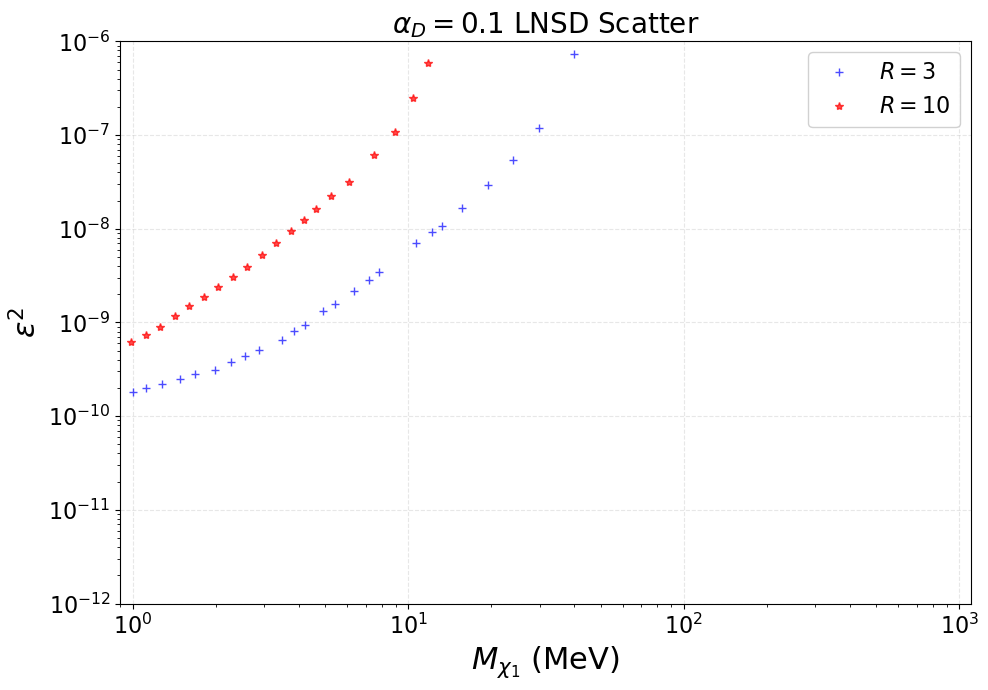

In [37]:
#limite_Delta0p05_alpha0p5

plt.figure(figsize=(10, 7))
#------------------------------------------------------------------------------------
plt.plot(limite_LSND_scatter_R3.Mx1, limite_LSND_scatter_R3.epsilon2, 
         '+', color='blue', markersize=6, alpha=0.7, label=r'$R = 3$')
plt.plot(limite_LSND_scatter_R10.Mx1, limite_LSND_scatter_R10.epsilon2, 
         '*', color='red', markersize=6, alpha=0.7, label=r'$R=10$')
#------------------------------------------------------------------------------------
elementos_graficos(r'$M_{\chi_{1}}$ (MeV)',r'$\epsilon^2 $')
plt.title(r'$\alpha_{D} = 0.1$ LNSD Scatter', size=20)
plt.tight_layout()
plt.legend(fontsize=16, framealpha=0.9, loc=0)
#plt.ylim(1e-15,1e-10)
#plt.text(5, 1e-8, r'DUNE', fontsize=12, color='black', rotation=25) 
plt.savefig(f'{pathImagenes}comparacion_lsndScatter.jpg', dpi=300)
plt.show()

In [13]:
df_omega_0p05_R3_0p1 = Table.read_table(f'{path0p05}Delta0p05_alpha0p1_R3_omega.csv')
df_omega_0p05_R4_0p1 = Table.read_table(f'{path0p05}Delta0p05_alpha0p1_R4_omega.csv')
df_omega_0p05_R5_0p1 = Table.read_table(f'{path0p05}Delta0p05_alpha0p1_R5_omega.csv')
#df_omega_0p05_R8_0p1 = Table.read_table(f'{path0p05}Delta0p05_alpha0p1_R8_omega.csv')
df_omega_0p05_R10_0p1 = Table.read_table(f'{path0p05}Delta0p05_alpha0p1_R10_omega.csv')

In [15]:
df_omega_0p1_R3_0p1 = Table.read_table(f'{path0p1}Delta0p1_alpha0p1_R3_omega.csv')
df_omega_0p1_R4_0p1 = Table.read_table(f'{path0p1}Delta0p1_alpha0p1_R4_omega.csv')
df_omega_0p1_R5_0p1 = Table.read_table(f'{path0p1}Delta0p1_alpha0p1_R5_omega.csv')
#df_omega_0p1_R8_0p1 = Table.read_table(f'{path0p1}Delta0p1_alpha0p1_R8_omega.csv')
df_omega_0p1_R10_0p1 = Table.read_table(f'{path0p1}Delta0p1_alpha0p1_R10_omega.csv')

In [16]:
limite_Delta0p01_alpha0p5 = Table.read_table(f'{pathLimites}exclusion_delta0p01_7years_alphaD_0p5.txt',sep=' ', names=['MAp','epsilon2'])
limite_Delta0p01_alpha0p1 = Table.read_table(f'{pathLimites}exclusion_delta_0p1_on-axis_7y_alphaD_0p1.txt',sep=' ', names=['MAp','epsilon2'])
limite_Delta0p05_alpha0p5 = Table.read_table(f'{pathLimites}exclusion_delta_0p05_7years_alphaD_0p5.txt',sep=' ', names=['MAp','epsilon2'])
limite_Delta0p1_alpha0p5 = Table.read_table(f'{pathLimites}exclusion_delta_0p1_7years_alphaD_0p5.txt',sep=' ', names=['MAp','epsilon2'])

In [17]:
limite_na64 = Table.read_table(f'{pathLimites}na64.csv',sep=';', names = ['Mx1', 'y'],decimal=',')
limite_na64['epsilon2'] = limite_na64['y'] / (0.1 * (1/10)**4)

limite_LSN_decay = Table.read_table(f'{pathLimites}LSN decay.csv', sep=';', names = ['Mx1', 'y'], decimal=',')
limite_LSN_decay['epsilon2'] = limite_LSN_decay['y'] /(0.5*(1/3)**4)

In [18]:
colores_R = { 
    3: 'lightcoral',
    5: '#E69F00',  # naranja
    8: '#2CA02C',  #Verde esmeralda
    10: '#56B4E9'  # azul claro
}
# Colores para los límites experimentales
colores_limites = {
    'Delta': '#000000',        # negro sólido
    'NA64': '#D55E00',         # naranja oscuro
    'NA64_1e12': '#D55E00',    # mismo naranja (linea punteada)
    'LSN': 'green',          # azul
    'BDX': 'blue',          # azul (punteado)
    'Miniboone': '#6A0DAD',    # púrpura
    'hline': 'darkgray',         # gris 
}

In [19]:
path1 = r'limitesidms/delta0p1_alpha0p5/'

factor = (1/10)**4 * 0.5

limite_babar = Table.read_table(f'{path1}BaBar.csv',sep=';', names = ['Mx1', 'y'],decimal=',')
limite_babar['epsilon2'] = limite_babar['y'] / factor
limite_babar['Mx1'] = limite_babar['Mx1'] * 1e3
limite_babar = limite_babar.sort('Mx1')

limite_charm = Table.read_table(f'{path1}CHARM.csv',sep=';', names = ['Mx1', 'y'],decimal=',')
limite_charm['epsilon2'] = limite_charm['y'] / factor
limite_charm['Mx1'] = limite_charm['Mx1'] * 1e3
limite_charm = limite_charm.sort('Mx1')

limite_na64 = Table.read_table(f'{path1}NA64.csv',sep=';', names = ['Mx1', 'y'],decimal=',')
limite_na64['epsilon2'] = limite_na64['y'] / factor
limite_na64['Mx1'] = limite_na64['Mx1'] * 1e3

limite_nucal = Table.read_table(f'{path1}NuCal.csv',sep=';', names = ['Mx1', 'y'],decimal=',')
limite_nucal['epsilon2'] = limite_nucal['y'] / factor
limite_nucal['Mx1'] = limite_nucal['Mx1'] * 1e3
limite_nucal = limite_nucal.sort('Mx1')

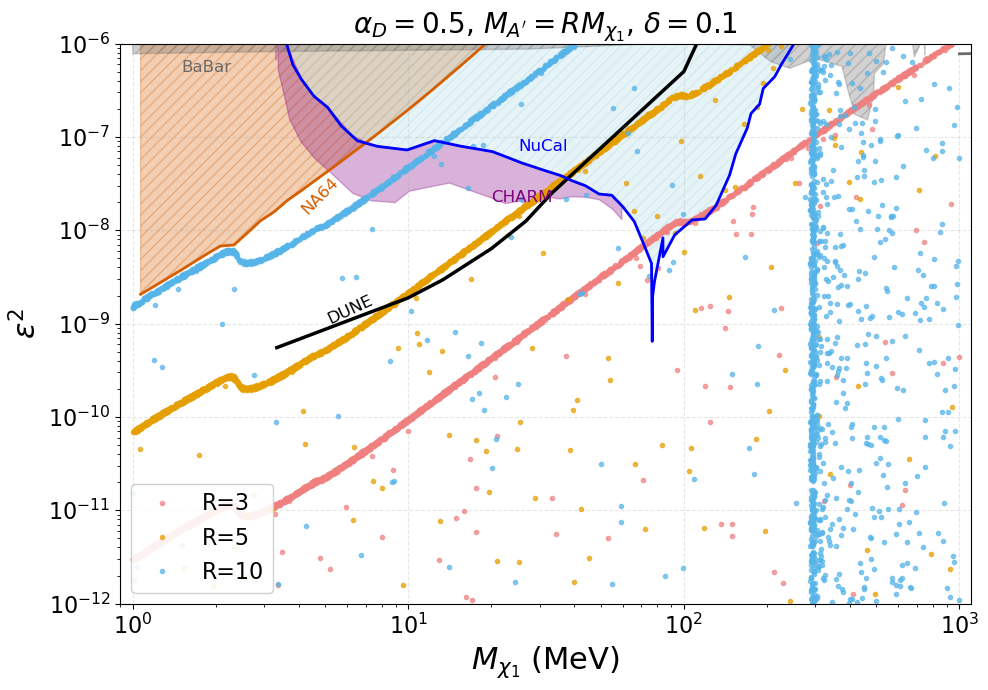

In [20]:
plt.figure(figsize=(10, 7))


#------------------------------------------------------------------------------------
plt.plot(df_omega_0p1_R3_0p5.column('Mx1'), df_omega_0p1_R3_0p5.column('epsilon')**2, 
         '.', color=colores_R[3], markersize=6, alpha=0.7, label='R=3')
plt.plot(df_omega_0p1_R5_0p5.column('Mx1'), df_omega_0p1_R5_0p5.column('epsilon')**2, 
         '.', color=colores_R[5], markersize=6, alpha=0.7, label='R=5')
plt.plot(df_omega_0p1_R10_0p5.column('Mx1'), df_omega_0p1_R10_0p5.column('epsilon')**2, 
         '.', color=colores_R[10], markersize=6, alpha=0.7, label='R=10')

#------------------------------------------------------------------------------------
plt.plot(limite_Delta0p1_alpha0p5.column('MAp')/3 *1e3, 
         limite_Delta0p1_alpha0p5.column('epsilon2'), 
         '-', color=colores_limites['Delta'], linewidth=2.5)
plt.text(5, 1e-9, r'DUNE', fontsize=12, color=colores_limites['Delta'], 
         rotation=25) 
#------------------------------------------------------------------------------------
plt.plot(limite_na64.column('Mx1'), limite_na64.column('epsilon2'),
         '-', color=colores_limites['NA64'], linewidth=2)

plt.fill_between(limite_na64.column('Mx1'), 
                 limite_na64.column('epsilon2'),
                 y2=plt.ylim()[1],
                 color=colores_limites['NA64'], 
                 alpha=0.3,
                 hatch='///')
plt.text(4, 1.5e-8, r'NA64', fontsize=12, color=colores_limites['NA64'], 
         rotation=45) 

#------------------------------------------------------------------------------------
plt.plot(limite_nucal.column('Mx1'), limite_nucal.column('epsilon2'),
         '-', color='blue', linewidth=2)
plt.text(25, 7e-8, r'NuCal', fontsize=12, color='blue', 
         rotation=0) 

plt.fill_between(limite_nucal.column('Mx1'), 
                 limite_nucal.column('epsilon2'),
                 y2=plt.ylim()[1],
                 color='lightblue', 
                 alpha=0.3,
                 hatch='///')

#------------------------------------------------------------------------------------
# Interpolar una función para que coincida con los puntos de la otra
# Vamos a crear una función interpolada para limite_nucal
x_nucal = limite_nucal.column('Mx1')
y_nucal = limite_nucal.column('epsilon2')

# Crear función de interpolación
interp_func = interpolate.interp1d(x_nucal, y_nucal, 
                                  bounds_error=False, 
                                  fill_value='extrapolate')

# Evaluar en los puntos de charm
x_charm = limite_charm.column('Mx1')
y_nucal_interpolated = interp_func(x_charm)

# Ahora podemos usar fill_between con arrays de la misma longitud
plt.fill_between(x_charm,
                 limite_charm.column('epsilon2'),  # Límite inferior
                 y_nucal_interpolated,             # Límite superior interpolado
                 where=(y_nucal_interpolated > limite_charm.column('epsilon2')),
                 color='purple', 
                 alpha=0.3)

plt.text(20, 2e-8, r'CHARM', fontsize=12, color='purple', 
         rotation=0) 
#------------------------------------------------------------------------------------

plt.plot(limite_babar.column('Mx1')*1e3, limite_babar.column('epsilon2'),
         '-', color='dimgray', linewidth=2)

plt.fill_between(limite_babar.column('Mx1'), 
                 limite_babar.column('epsilon2'),
                 y2=plt.ylim()[1],
                 color='dimgray', 
                 alpha=0.3,
                 hatch='///')
plt.text(1.5, 5e-7, r'BaBar', fontsize=12, color='dimgray', 
         rotation=0) 
#------------------------------------------------------------------------------------
# Configuración del gráfico
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\epsilon^2$', size=22)
plt.xlabel(r'$M_{\chi_{1}}$ (MeV)', size=22)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, framealpha=0.9, loc=3)
plt.xlim(0.9, 1100)
plt.ylim(1e-12, 1e-6)

# Título
plt.title(r'$\alpha_{D} = 0.5$, $M_{A^{\prime}} = R M_{\chi_{1}}$, $\delta = 0.1$', size=20)

# Mejorar el layout
plt.tight_layout()
plt.savefig(f'{pathImagenes}Delta0p1_alpha0p5_Limites.jpg', dpi=300)
plt.show()

In [21]:
path1 = r'limitesidms/delta0p1_alpha0p1/'

factor = (1/3)**4 * 0.1

limite_babar = Table.read_table(f'{path1}BaBar.csv',sep=';', names = ['Mx1', 'y'],decimal=',')
limite_babar['epsilon2'] = limite_babar['y']/factor
#imite_babar['Mx1'] = limite_babar['Mx1'] * 1e3

limite_e137_decay = Table.read_table(f'{path1}E137 Decay.csv',sep=';', names = ['Mx1', 'y'],decimal=',')
limite_e137_decay['epsilon2'] = limite_e137_decay['y'] / factor
limite_e137_decay = limite_e137_decay.sort('Mx1')

limite_e137_scatter = Table.read_table(f'{path1}E137 Scatter.csv',sep=';', names = ['Mx1', 'y'],decimal=',')
limite_e137_scatter['epsilon2'] = limite_e137_scatter['y'] / factor
#limite_e137_scatter['Mx1'] = limite_e137_scatter['Mx1'] * 1e3
#limite_e137_scatter['Mx1'] = limite_e137_scatter['Mx1'] /1e3

limite_LSND_decay = Table.read_table(f'{path1}LSND Decay.csv',sep=';', names = ['Mx1', 'y'],decimal=',')
limite_LSND_decay['epsilon2'] = limite_LSND_decay['y'] / factor


limite_LSND_scatter = Table.read_table(f'{path1}LSND Scatter.csv',sep=';', names = ['Mx1', 'y'],decimal=',')
limite_LSND_scatter['epsilon2'] = limite_LSND_scatter['y'] / factor

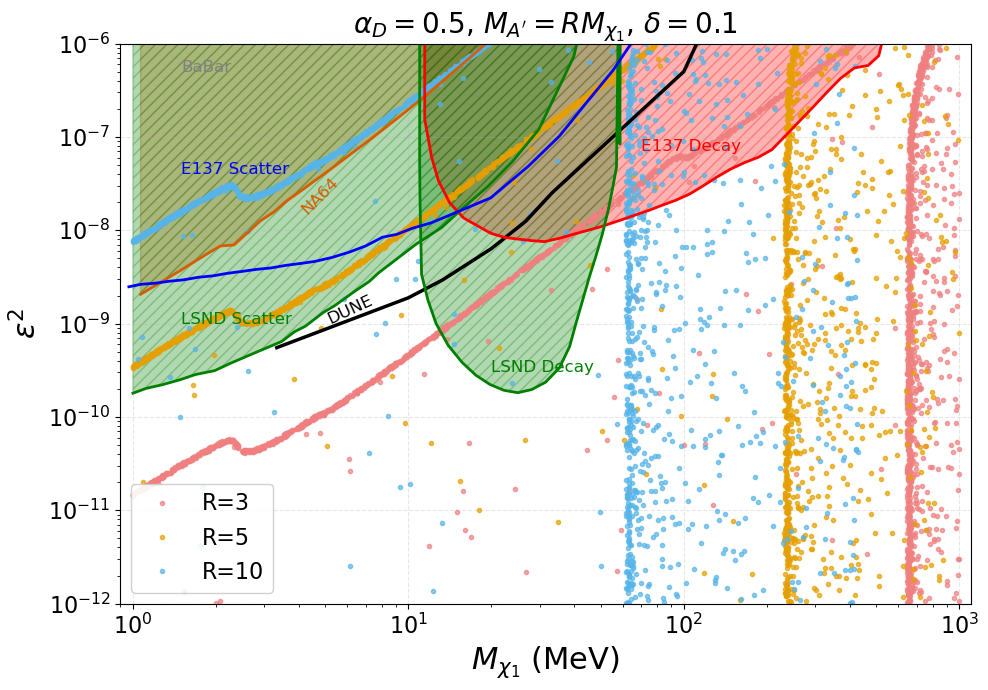

In [22]:
plt.figure(figsize=(10, 7))


#------------------------------------------------------------------------------------
plt.plot(df_omega_0p1_R3_0p1.column('Mx1'), df_omega_0p1_R3_0p1.column('epsilon')**2, 
         '.', color=colores_R[3], markersize=6, alpha=0.7, label='R=3')
plt.plot(df_omega_0p1_R5_0p1.column('Mx1'), df_omega_0p1_R5_0p1.column('epsilon')**2, 
         '.', color=colores_R[5], markersize=6, alpha=0.7, label='R=5')
plt.plot(df_omega_0p1_R10_0p1.column('Mx1'), df_omega_0p1_R10_0p1.column('epsilon')**2, 
         '.', color=colores_R[10], markersize=6, alpha=0.7, label='R=10')

#------------------------------------------------------------------------------------
plt.plot(limite_Delta0p1_alpha0p5.column('MAp')/3 *1e3, 
         limite_Delta0p1_alpha0p5.column('epsilon2'), 
         '-', color=colores_limites['Delta'], linewidth=2.5)
plt.text(5, 1e-9, r'DUNE', fontsize=12, color=colores_limites['Delta'], 
         rotation=25) 
#------------------------------------------------------------------------------------
plt.plot(limite_na64.column('Mx1'), limite_na64.column('epsilon2'),
         '-', color=colores_limites['NA64'], linewidth=2)

plt.fill_between(limite_na64.column('Mx1'), 
                 limite_na64.column('epsilon2'),
                 y2=plt.ylim()[1],
                 color=colores_limites['NA64'], 
                 alpha=0.3,
                 hatch='///')
plt.text(4, 1.5e-8, r'NA64', fontsize=12, color=colores_limites['NA64'], 
         rotation=45) 

#------------------------------------------------------------------------------------
plt.plot(limite_e137_decay.column('Mx1'), limite_e137_decay.column('epsilon2'),
         '-', color='red', linewidth=2)
plt.text(70, 7e-8, r'E137 Decay', fontsize=12, color='red', 
         rotation=0) 

plt.fill_between(limite_e137_decay.column('Mx1'), 
                 limite_e137_decay.column('epsilon2'),
                 y2=plt.ylim()[1],
                 color='red', 
                 alpha=0.3,
                 hatch='///')

#------------------------------------------------------------------------------------

plt.plot(limite_LSND_decay.column('Mx1'), limite_LSND_decay.column('epsilon2'),
         '-', color='green', linewidth=2)

plt.fill_between(limite_LSND_decay.column('Mx1'), 
                 limite_LSND_decay.column('epsilon2'),
                 y2=plt.ylim()[1],
                 color='green', 
                 alpha=0.3,
                 hatch='///')
plt.text(20, 3e-10, r'LSND Decay', fontsize=12, color='green', 
         rotation=0) 
#------------------------------------------------------------------------------------

plt.plot(limite_LSND_scatter.column('Mx1'), limite_LSND_scatter.column('epsilon2'),
         '-', color='green', linewidth=2)

plt.fill_between(limite_LSND_scatter.column('Mx1'), 
                 limite_LSND_scatter.column('epsilon2'),
                 y2=plt.ylim()[1],
                 color='green', 
                 alpha=0.3,
                 hatch='///')
plt.text(1.5, 1e-9, r'LSND Scatter', fontsize=12, color='green', 
         rotation=0) 
#------------------------------------------------------------------------------------

plt.plot(limite_e137_scatter.column('Mx1'), limite_e137_scatter.column('epsilon2'),
         '-', color='blue', linewidth=2)


plt.text(1.5, 4e-8, r'E137 Scatter', fontsize=12, color='blue', 
         rotation=0) 
#------------------------------------------------------------------------------------

plt.plot(limite_babar.column('Mx1'), limite_babar.column('epsilon2'),
         '-', color='gray', linewidth=2)

plt.fill_between(limite_babar.column('Mx1'), 
                 limite_babar.column('epsilon2'),
                 y2=plt.ylim()[1],
                 color='gray', 
                 alpha=0.3,
                 hatch='///')
plt.text(1.5, 5e-7, r'BaBar', fontsize=12, color='gray', 
         rotation=0) 
#------------------------------------------------------------------------------------
# Configuración del gráfico
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\epsilon^2$', size=22)
plt.xlabel(r'$M_{\chi_{1}}$ (MeV)', size=22)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16, framealpha=0.9, loc=3)
plt.xlim(0.9, 1100)
plt.ylim(1e-12, 1e-6)

# Título
plt.title(r'$\alpha_{D} = 0.5$, $M_{A^{\prime}} = R M_{\chi_{1}}$, $\delta = 0.1$', size=20)

# Mejorar el layout
plt.tight_layout()
plt.savefig(f'{pathImagenes}Delta0p1_alpha0p1_Limites.jpg', dpi=300)
plt.show()

In [23]:
path1 = r'limitesidms/delta0p05_alpha0p5/'

factor = (1/3)**4 * 0.1

limite_babar = pd.read_csv(f'{path1}BaBar.csv',sep=';', names = ['Mx1', 'epsilon'],decimal=',')
limite_babar['Mx1'] = limite_babar['Mx1'] * 1e3

limite_charm = pd.read_csv(f'{path1}CHARM.csv',sep=';', names = ['Mx1', 'epsilon'],decimal=',')
limite_charm = limite_charm.sort_values('Mx1')
limite_charm['Mx1'] = limite_charm['Mx1'] * 1e3

limite_nucal = pd.read_csv(f'{path1}NuCal.csv',sep=';', names = ['Mx1', 'epsilon'],decimal=',')
limite_nucal = limite_charm.sort_values('Mx1')
limite_nucal['Mx1'] = limite_nucal['Mx1'] * 1e3

limite_varios = pd.read_csv(f'{path1}LSND + E137 + MiniBooNE.csv',sep=';', names = ['Mx1', 'epsilon'],decimal=',')
limite_varios['Mx1'] = limite_varios['Mx1'] * 1e3

limite_LSND_decay = pd.read_csv(f'{path1}LSND Decay.csv',sep=';', names = ['Mx1', 'epsilon'],decimal=',')
limite_LSND_decay['Mx1'] = limite_LSND_decay['Mx1'] * 1e3

limite_na62 = pd.read_csv(f'{path1}NA62.csv',sep=';', names = ['Mx1', 'epsilon'],decimal=',')
limite_na62['Mx1'] = limite_na62['Mx1'] * 1e3
limite_na62 = limite_na62.sort_values('Mx1')

In [24]:


plt.figure(figsize=(10,7))

#------------------------------------------------------------------------------------
# Plot de todas las curvas con consistencia en estilo
plt.plot(df_omega_0p05_R3_0p5.column('Mx1'), df_omega_0p05_R3_0p5.column('epsilon')**2, 
         '.', color=colores_R[3], markersize=6, alpha=0.7, label='R=5')
plt.plot(df_omega_0p05_R5_0p5.column('Mx1'), df_omega_0p05_R5_0p5.column('epsilon')**2, 
         '.', color=colores_R[5], markersize=6, alpha=0.7, label='R=5')
plt.plot(df_omega_0p05_R8_0p5.column('Mx1'), df_omega_0p05_R8_0p5.column('epsilon')**2, 
         '.', color=colores_R[8], markersize=6, alpha=0.7, label='R=8')
plt.plot(df_omega_0p05_R10_0p5.column('Mx1'), df_omega_0p05_R10_0p5.column('epsilon')**2, 
         '.', color=colores_R[10], markersize=6, alpha=0.7, label='R=10')
#------------------------------------------------------------------------------------

plt.plot(limite_NuCal.column('Mx1'), limite_NuCal.column('epsilon')**2 , '-' , color='blue' )
plt.text(100, 1e-7, r'NuCal', fontsize=12, color='blue', 
         rotation=0)
#------------------------------------------------------------------------------------
plt.plot(limite_BaBar_2.column('Mx1'), limite_BaBar_2.column('epsilon')**2, '-', color='gray')

plt.fill_between(limite_BaBar_2.column('Mx1'), 
                 limite_BaBar_2.column('epsilon')**2,
                 y2=plt.ylim()[1],
                 color='gray', 
                 alpha=0.3,
                 hatch='///')
plt.text(10, 1.3e-6, r'BaBar', fontsize=12, color='black', 
         rotation=0) 
#------------------------------------------------------------------------------------
plt.plot(limite_charm['Mx1'], limite_charm['epsilon']**2,
         '-', color='magenta', linewidth=2)
plt.text(70, 3e-8, r'CHARM', fontsize=12, color='magenta', 
         rotation=0) 
plt.fill_between(limite_charm['Mx1'], 
                 limite_charm['epsilon']**2,
                 y2=plt.ylim()[1],
                 color='magenta', 
                 alpha=0.3,
                 hatch='///')
#------------------------------------------------------------------------------------
plt.plot(limite_varios['Mx1'], limite_varios['epsilon']**2,
         '-', color='gray', linewidth=2)
plt.text(2.3, 4e-7, r'LSND + E137 + MiniBooNE', fontsize=12, color='gray', 
         rotation=0) 
plt.fill_between(limite_varios['Mx1'], 
                 limite_varios['epsilon']**2,
                 y2=plt.ylim()[1],
                 color='gray', 
                 alpha=0.3,
                 hatch='///')
#------------------------------------------------------------------------------------
plt.plot(limite_na62['Mx1'], limite_na62['epsilon']**2,
         '-', color='red', linewidth=2)
plt.text(260, 1e-10, r'NA62', fontsize=12, color='red', 
         rotation=0) 
plt.fill_between(limite_na62['Mx1'], 
                 limite_na62['epsilon']**2,
                 y2=plt.ylim()[1],
                 color='red', 
                 alpha=0.3,
                 hatch='///')
#------------------------------------------------------------------------------------
plt.plot(limite_LSND_decay['Mx1'], limite_LSND_decay['epsilon']**2,
         '-', color='gray', linewidth=2)
plt.fill_between(limite_LSND_decay['Mx1'], 
                 limite_LSND_decay['epsilon']**2,
                 y2=plt.ylim()[1],
                 color='gray', 
                 alpha=0.3,
                 hatch='///')
#------------------------------------------------------------------------------------
plt.plot(limite_Delta0p05_alpha0p5.column('MAp')/3 *1e3 , limite_Delta0p05_alpha0p5.column('epsilon2'), '-', color='black')
plt.text(10, 1e-9, r'DUNE', fontsize=12, color='black', 
         rotation=0)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\epsilon^2$',size=20)
plt.xlabel(r'$M_{\chi_{1}}$ (MeV)',size=20)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0.9,1100)
plt.ylim(1e-12,1e-5)
plt.title(r'$\alpha_{D} = 0.5\text{, } M_{A^{\prime}} = R M_{\chi_{1}}\text{, } \delta = 0.05$',size=20)
plt.savefig(f'{pathImagenes}Delta0p05_alpha0p5_variosR_limites.jpg',dpi=300)
plt.show()

NameError: name 'limite_NuCal' is not defined

In [29]:
path1 = r'limitesidms/delta0p01_alpha0p1/'

factor = (1/3)**4 * 0.1

limite_babar = pd.read_csv(f'{path1}BaBar.csv',sep=';', names = ['Mx1', 'y'],decimal=',')
limite_babar = limite_babar.sort_values('Mx1')
limite_babar['epsilon2'] = limite_babar['y'] / factor


limite_LSND_scatter = pd.read_csv(f'{path1}LSND Scatter.csv',sep=';', names = ['Mx1', 'y'],decimal=',')
limite_LSND_scatter = limite_LSND_scatter.sort_values('Mx1')
limite_LSND_scatter['epsilon2'] = limite_LSND_scatter['y'] / factor

limite_e137_scatter = pd.read_csv(f'{path1}E137 Scatter.csv',sep=';', names = ['Mx1', 'y'],decimal=',')
limite_e137_scatter = limite_e137_scatter.sort_values('Mx1')
limite_e137_scatter['epsilon2'] = limite_e137_scatter['y'] / factor

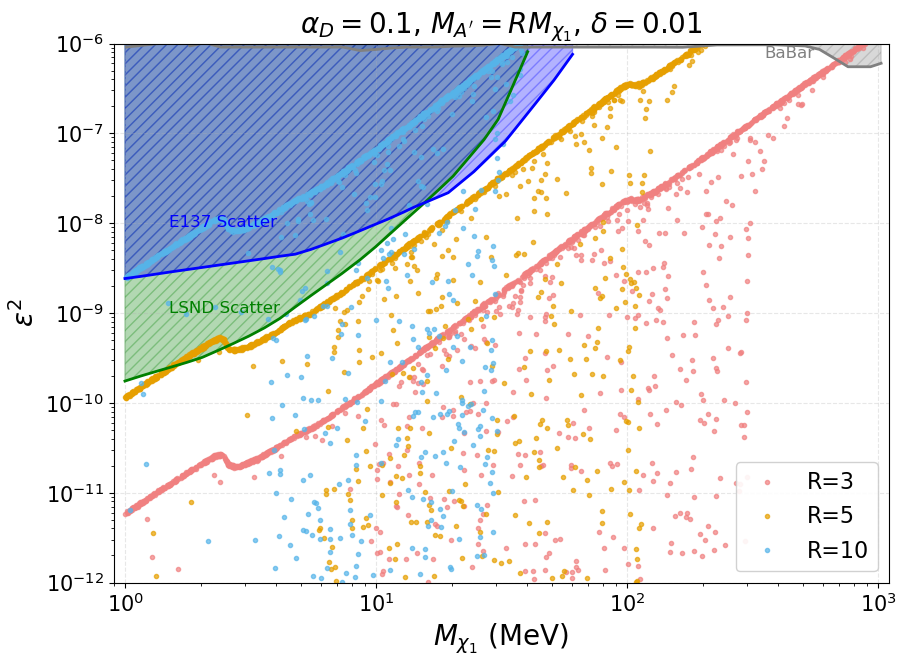

In [30]:

plt.figure(figsize=(10,7))

#------------------------------------------------------------------------------------
# Plot de todas las curvas con consistencia en estilo
plt.plot(df_omega_0p01_R3_0p1.column('Mx1'), df_omega_0p01_R3_0p1.column('epsilon')**2, 
         '.', color=colores_R[3], markersize=6, alpha=0.7, label='R=3')
plt.plot(df_omega_0p01_R5_0p1.column('Mx1'), df_omega_0p01_R5_0p1.column('epsilon')**2, 
         '.', color=colores_R[5], markersize=6, alpha=0.7, label='R=5')
plt.plot(df_omega_0p01_R10_0p1.column('Mx1'), df_omega_0p01_R10_0p1.column('epsilon')**2, 
         '.', color=colores_R[10], markersize=6, alpha=0.7, label='R=10')
#------------------------------------------------------------------------------------
plt.plot(limite_babar['Mx1'], limite_babar['epsilon2'],
         '-', color='gray', linewidth=2)
plt.text(350, 7e-7, r'BaBar', fontsize=12, color='gray', 
         rotation=0) 
plt.fill_between(limite_babar['Mx1'], 
                 limite_babar['epsilon2'],
                 y2=plt.ylim()[1],
                 color='gray', 
                 alpha=0.3,
                 hatch='///')
#------------------------------------------------------------------------------------
plt.plot(limite_LSND_scatter['Mx1'], limite_LSND_scatter['epsilon2'],
         '-', color='green', linewidth=2)
plt.text(1.5, 1e-9, r'LSND Scatter', fontsize=12, color='green', 
         rotation=0) 
plt.fill_between(limite_LSND_scatter['Mx1'], 
                 limite_LSND_scatter['epsilon2'],
                 y2=plt.ylim()[1],
                 color='green', 
                 alpha=0.3,
                 hatch='///')
#------------------------------------------------------------------------------------
plt.plot(limite_e137_scatter['Mx1'], limite_e137_scatter['epsilon2'],
         '-', color='blue', linewidth=2)
plt.text(1.5, 9e-9, r'E137 Scatter', fontsize=12, color='blue', 
         rotation=0) 
plt.fill_between(limite_e137_scatter['Mx1'], 
                 limite_e137_scatter['epsilon2'],
                 y2=plt.ylim()[1],
                 color='blue', 
                 alpha=0.3,
                 hatch='///')
#------------------------------------------------------------------------------------
#plt.plot(limite_Delta0p05_alpha0p5.column('MAp')/3 *1e3 , limite_Delta0p05_alpha0p5.column('epsilon2'), '-', color='black')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\epsilon^2$',size=20)
plt.xlabel(r'$M_{\chi_{1}}$ (MeV)',size=20)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=16, framealpha=0.9, loc=4)
plt.xlim(0.9,1100)
plt.ylim(1e-12,1e-6)
plt.title(r'$\alpha_{D} = 0.1\text{, } M_{A^{\prime}} = R M_{\chi_{1}}\text{, } \delta = 0.01$',size=20)
plt.savefig(f'{pathImagenes}Delta0p01_alpha0p1_varios_R_limites.jpg',dpi=300)
plt.show()

https://journals.aps.org/prl/supplemental/10.1103/PhysRevLett.126.181801/supplemental.pdf 

In [ ]:

plt.figure(figsize=(10,7))

#------------------------------------------------------------------------------------
# Plot de todas las curvas con consistencia en estilo
plt.plot(df_omega_0p01_R3_0p5.column('Mx1'), df_omega_0p01_R3_0p5.column('epsilon')**2, 
         '.', color=colores_R[3], markersize=6, alpha=0.7, label='R=3')

plt.plot(df_omega_0p01_R5_0p5.column('Mx1'), df_omega_0p01_R5_0p5.column('epsilon')**2, 
         '.', color=colores_R[5], markersize=6, alpha=0.7, label='R=5')

plt.plot(df_omega_0p01_R10_0p5.column('Mx1'), df_omega_0p01_R10_0p5.column('epsilon')**2, 
         '.', color=colores_R[10], markersize=6, alpha=0.7, label='R=10')
#------------------------------------------------------------------------------------
#plt.plot(limite_Delta0p05_alpha0p5.column('MAp')/3 *1e3 , limite_Delta0p05_alpha0p5.column('epsilon2'), '-', color='black')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\epsilon^2$',size=20)
plt.xlabel(r'$M_{\chi_{1}}$ (MeV)',size=20)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=16, framealpha=0.9, loc=0)
plt.xlim(0.9,1100)
plt.ylim(1e-12,1e-6)
plt.title(r'$\alpha_{D} = 0.5\text{, } M_{A^{\prime}} = R M_{\chi_{1}}\text{, } \delta = 0.05$',size=20)
plt.savefig(f'{pathImagenes}delta0p01_alpha0p5_varios_R_solo.jpg',dpi=300)
plt.show()

In [ ]:

plt.figure(figsize=(10,7))

#------------------------------------------------------------------------------------
# Plot de todas las curvas con consistencia en estilo
plt.plot(df_omega_0p01_R5_0p1.column('Mx1'), df_omega_0p01_R5_0p1.column('epsilon')**2, 
         '.', color=colores_R[5], markersize=6, alpha=0.7, label='R=5')
#plt.plot(df_omega_0p01_R8_0p1.column('Mx1'), df_omega_0p01_R8_0p1.column('epsilon')**2, 
#        '.', color=colores_R[8], markersize=6, alpha=0.7, label='R=8')
plt.plot(df_omega_0p01_R10_0p1.column('Mx1'), df_omega_0p01_R10_0p1.column('epsilon')**2, 
         '.', color=colores_R[10], markersize=6, alpha=0.7, label='R=10')


#plt.plot(limite_Delta0p01_alpha0p5.column('MAp')/3 *1e3 , limite_Delta0p01_alpha0p5.column('epsilon2'), '-', color='black')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\epsilon^2$',size=20)
plt.xlabel(r'$M_{\chi_{1}}$ (MeV)',size=20)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.xlim(0.9,1100)
plt.ylim(1e-12,1e-6)
plt.title(r'$\alpha_{D} = 0.1\text{, } M_{A^{\prime}} = R M_{\chi_{1}}\text{, } \Delta = 0.01$',size=20)
plt.savefig(f'{pathImagenes}Delta0p01_alpha0p1_varios_R.jpg',dpi=300)
plt.show()

In [ ]:


plt.figure(figsize=(10,7))

#------------------------------------------------------------------------------------
# Plot de todas las curvas con consistencia en estilo
plt.plot(df_omega_0p05_R5_0p1.column('Mx1'), df_omega_0p05_R5_0p1.column('epsilon')**2, 
         '.', color=colores_R[5], markersize=6, alpha=0.7, label='R=5')
#plt.plot(df_omega_0p05_R8_0p1.column('Mx1'), df_omega_0p05_R8_0p1.column('epsilon')**2, 
#         '.', color=colores_R[8], markersize=6, alpha=0.7, label='R=8')
plt.plot(df_omega_0p05_R10_0p1.column('Mx1'), df_omega_0p05_R10_0p1.column('epsilon')**2, 
         '.', color=colores_R[10], markersize=6, alpha=0.7, label='R=10')


#plt.plot(limite_Delta0p01_alpha0p5.column('MAp')/3 *1e3 , limite_Delta0p01_alpha0p5.column('epsilon2'), '-', color='black')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\epsilon^2$',size=20)
plt.xlabel(r'$M_{\chi_{1}}$ (MeV)',size=20)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.xlim(0.9,1100)
plt.ylim(1e-12,1e-6)
plt.title(r'$\alpha_{D} = 0.1\text{, } M_{A^{\prime}} = R M_{\chi_{1}}\text{, } \Delta = 0.05$',size=20)
plt.savefig(f'{pathImagenes}Delta0p05_alpha0p1_varios_R.jpg',dpi=300)
plt.show()

In [ ]:


plt.figure(figsize=(10,7))

#------------------------------------------------------------------------------------
# Plot de todas las curvas con consistencia en estilo
plt.plot(df_omega_0p1_R5_0p1.column('Mx1'), df_omega_0p1_R5_0p1.column('epsilon')**2, 
         '.', color=colores_R[5], markersize=6, alpha=0.7, label='R=5')
#plt.plot(df_omega_0p1_R8_0p1.column('Mx1'), df_omega_0p1_R8_0p1.column('epsilon')**2, 
#         '.', color=colores_R[8], markersize=6, alpha=0.7, label='R=8')
plt.plot(df_omega_0p1_R10_0p1.column('Mx1'), df_omega_0p1_R10_0p1.column('epsilon')**2, 
         '.', color=colores_R[10], markersize=6, alpha=0.7, label='R=10')


#plt.plot(limite_Delta0p01_alpha0p5.column('MAp')/3 *1e3 , limite_Delta0p01_alpha0p5.column('epsilon2'), '-', color='black')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\epsilon^2$',size=20)
plt.xlabel(r'$M_{\chi_{1}}$ (MeV)',size=20)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.xlim(0.9,1100)
plt.ylim(1e-12,1e-6)
plt.title(r'$\alpha_{D} = 0.1\text{, } M_{A^{\prime}} = R M_{\chi_{1}}\text{, } \Delta = 0.1$',size=20)
plt.savefig(f'{pathImagenes}Delta0p01_alpha0p1_varios_R.jpg',dpi=300)
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

#------------------------------------------------------------------------------------
ax1.plot(df_omega_0p01_R3_0p5.column('Mx1'), df_omega_0p01_R3_0p5.column('epsilon')**2, 
         '.', color=colores_R[3], linewidth=2, alpha=0.8, label='R=3')

ax1.text(3, 6e-12, r'R = 3', fontsize=16, color='black', 
         rotation=35) 
#------------------------------------------------------------------------------------
ax1.plot(df_omega_0p01_R5_0p5.column('Mx1'), df_omega_0p01_R5_0p5.column('epsilon')**2, 
         '.', color=colores_R[5], linewidth=2, alpha=0.8, label='R=5')
ax1.text(3, 1.3e-10, r'R = 5', fontsize=16, color='black', 
         rotation=35) 
#------------------------------------------------------------------------------------
ax1.plot(df_omega_0p01_R10_0p5.column('Mx1'), df_omega_0p01_R10_0p5.column('epsilon')**2, 
         '.', color=colores_R[10], linewidth=2, alpha=0.8, label='R=10')
ax1.text(3, 2.5e-9, r'R = 10', fontsize=16, color='black', 
         rotation=35) 
#------------------------------------------------------------------------------------
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_title(r'$\delta = 0.01 \text{, } \alpha_{D} = 0.5$', size=16)
ax1.set_xlabel(r'$M_{\chi_1}$ (MeV)', size=16)
ax1.set_ylabel(r'$\epsilon^2$', size=16)
ax1.grid(True, linestyle='--', alpha=0.3)
#ax1.legend(fontsize=12)
ax1.set_ylim(1e-12, 1e-6)
ax1.set_xlim(1, 1e3)
ax1.tick_params(axis='both', labelsize=12)

# Subplot 2:
#------------------------------------------------------------------------------------
ax2.plot(df_omega_0p01_R3_0p1.column('Mx1'), df_omega_0p01_R3_0p1.column('epsilon')**2, 
         '.', color=colores_R[3], linewidth=2, alpha=0.8, label='R=3')
ax2.text(3, 6e-12, r'R = 3', fontsize=16, color='black', 
         rotation=35) 
#------------------------------------------------------------------------------------
ax2.plot(df_omega_0p01_R5_0p1.column('Mx1'), df_omega_0p01_R5_0p1.column('epsilon')**2, 
         '.', color=colores_R[5], linewidth=2, alpha=0.8, label='R=5')
ax2.text(3, 1.3e-10, r'R = 5', fontsize=16, color='black', 
         rotation=35) 
#------------------------------------------------------------------------------------
ax2.plot(df_omega_0p01_R10_0p1.column('Mx1'), df_omega_0p01_R10_0p1.column('epsilon')**2, 
         '.', color=colores_R[10], linewidth=2, alpha=0.8, label='R=10')
ax2.text(3, 2.5e-9, r'R = 10', fontsize=16, color='black', 
         rotation=35) 
#------------------------------------------------------------------------------------
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_title(r'$\delta = 0.01 \text{, } \alpha_{D} = 0.1$', size=16)
ax2.set_xlabel(r'$M_{\chi_1}$ (MeV)', size=16)
ax2.grid(True, linestyle='--', alpha=0.3)
#ax2.legend(fontsize=12)
ax2.set_ylim(1e-12, 1e-6)
ax2.set_xlim(1,1e3)
ax2.tick_params(axis='both', labelsize=12)

# Ajustar espaciado entre subplots
plt.tight_layout()
plt.savefig(f'{pathImagenes}graficoComparativo_delta0p01.jpg',dpi=300)
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

#------------------------------------------------------------------------------------
ax1.plot(df_omega_0p05_R3_0p5.column('Mx1'), df_omega_0p05_R3_0p5.column('epsilon')**2, 
         '.', color=colores_R[3], linewidth=2, alpha=0.8, label='R=3')
ax1.text(3, 9e-12, r'R = 3', fontsize=16, color='black', 
         rotation=35) 
#------------------------------------------------------------------------------------

ax1.plot(df_omega_0p05_R5_0p5.column('Mx1'), df_omega_0p05_R5_0p5.column('epsilon')**2, 
         '.', color=colores_R[5], linewidth=2, alpha=0.8, label='R=5')
ax1.text(3, 2e-10, r'R = 5', fontsize=16, color='black', 
         rotation=35)
#------------------------------------------------------------------------------------

ax1.plot(df_omega_0p05_R10_0p5.column('Mx1'), df_omega_0p05_R10_0p5.column('epsilon')**2, 
         '.', color=colores_R[10], linewidth=2, alpha=0.8, label='R=10')
ax1.text(3, 5e-9, r'R = 10', fontsize=16, color='black', 
         rotation=35) 
#------------------------------------------------------------------------------------

ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_title(r'$\delta = 0.05 \text{, } \alpha_{D} = 0.5$', size=16)
ax1.set_xlabel(r'$M_{\chi_1}$ (MeV)', size=16)
ax1.set_ylabel(r'$\epsilon^2$', size=16)
ax1.grid(True, linestyle='--', alpha=0.3)
#ax1.legend(fontsize=12)
ax1.set_ylim(1e-12, 1e-6)
ax1.set_xlim(1, 1e3)
ax1.tick_params(axis='both', labelsize=12)
# Subplot 2:
#------------------------------------------------------------------------------------
ax2.plot(df_omega_0p05_R3_0p1.column('Mx1'), df_omega_0p05_R3_0p1.column('epsilon')**2, 
         '.', color=colores_R[3], linewidth=2, alpha=0.8, label='R=3')
ax2.text(3, 9e-12, r'R = 3', fontsize=16, color='black', 
         rotation=35) 
#------------------------------------------------------------------------------------
ax2.plot(df_omega_0p05_R5_0p1.column('Mx1'), df_omega_0p05_R5_0p1.column('epsilon')**2, 
         '.', color=colores_R[5], linewidth=2, alpha=0.8, label='R=5')
ax2.text(3, 2e-10, r'R = 5', fontsize=16, color='black', 
         rotation=35)
#------------------------------------------------------------------------------------
ax2.plot(df_omega_0p05_R10_0p1.column('Mx1'), df_omega_0p05_R10_0p1.column('epsilon')**2, 
         '.', color=colores_R[10], linewidth=2, alpha=0.8, label='R=10')
ax2.text(3, 5e-9, r'R = 10', fontsize=16, color='black', 
         rotation=35) 
#------------------------------------------------------------------------------------
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_title(r'$\delta = 0.05 \text{, } \alpha_{D} = 0.1$', size=16)
ax2.set_xlabel(r'$M_{\chi_1}$ (MeV)', size=16)
ax2.grid(True, linestyle='--', alpha=0.3)
ax2.legend(fontsize=12)
ax2.set_ylim(1e-12, 1e-6)
ax2.set_xlim(1,1e3)
ax2.tick_params(axis='both', labelsize=12)

# Ajustar espaciado entre subplots
plt.tight_layout()
plt.savefig(f'{pathImagenes}graficoComparativo_delta0p05.jpg',dpi=300)
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

#------------------------------------------------------------------------------------
# Subplot 1: alpha_D = 0.5
ax1.plot(df_omega_0p1_R3_0p5.column('Mx1'), df_omega_0p1_R3_0p5.column('epsilon')**2, 
         '.', color=colores_R[3], markersize=6, alpha=0.8, label='R=3')
ax1.text(3, 2e-11, r'R = 3', fontsize=16, color='black', 
         rotation=35) 
#------------------------------------------------------------------------------------
ax1.plot(df_omega_0p1_R5_0p5.column('Mx1'), df_omega_0p1_R5_0p5.column('epsilon')**2, 
         '.', color=colores_R[5], markersize=6, alpha=0.8, label='R=5')
ax1.text(3, 3.5e-10, r'R = 5', fontsize=16, color='black', 
         rotation=35)
#------------------------------------------------------------------------------------

ax1.plot(df_omega_0p1_R10_0p5.column('Mx1'), df_omega_0p1_R10_0p5.column('epsilon')**2, 
         '.', color=colores_R[10], markersize=6, alpha=0.8, label='R=10')
ax1.text(3, 9e-9, r'R = 10', fontsize=16, color='black', 
         rotation=35) 
#------------------------------------------------------------------------------------

ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_title(r'$\delta = 0.1 \text{, } \alpha_{D} = 0.5$', size=16)
ax1.set_xlabel(r'$M_{\chi_1}$ (MeV)', size=16)
ax1.set_ylabel(r'$\epsilon^2$', size=16)
ax1.grid(True, linestyle='--', alpha=0.3)
#ax1.legend(fontsize=10)
ax1.set_ylim(1e-12, 1e-6)
ax1.set_xlim(1, 1e3)
ax1.tick_params(axis='both', labelsize=12)

# Subplot 2: alpha_D = 0.1
ax2.plot(df_omega_0p1_R3_0p1.column('Mx1'), df_omega_0p1_R3_0p1.column('epsilon')**2, 
         '.', color=colores_R[8], markersize=6, alpha=0.8, label='R=3')
ax2.text(3, 2e-11, r'R = 3', fontsize=16, color='black', 
         rotation=35) 
#------------------------------------------------------------------------------------
ax2.plot(df_omega_0p1_R5_0p1.column('Mx1'), df_omega_0p1_R5_0p1.column('epsilon')**2, 
         '.', color=colores_R[5], markersize=6, alpha=0.8, label='R=5')
ax2.text(3, 3.5e-10, r'R = 5', fontsize=16, color='black', 
         rotation=35)
#------------------------------------------------------------------------------------
ax2.plot(df_omega_0p1_R10_0p1.column('Mx1'), df_omega_0p1_R10_0p1.column('epsilon')**2, 
         '.', color=colores_R[10], markersize=6, alpha=0.8, label='R=10')
ax2.text(3, 9e-9, r'R = 10', fontsize=16, color='black', 
         rotation=35) 
#------------------------------------------------------------------------------------
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_title(r'$\delta = 0.1 \text{, } \alpha_{D} = 0.1$', size=16)
ax2.set_xlabel(r'$M_{\chi_1}$ (MeV)', size=16)
ax2.grid(True, linestyle='--', alpha=0.3)
#ax2.legend(fontsize=10)
ax2.set_ylim(1e-12, 1e-6)
ax2.set_xlim(1, 1e3)
ax2.tick_params(axis='both', labelsize=12)

# Ajustar espaciado entre subplots
plt.tight_layout()

plt.savefig(f'{pathImagenes}graficoComparativo_delta0p1.jpg',dpi=300)
plt.show()

In [ ]:
df_omega_0p05_R5_0p5['ratio']  = df_omega_0p05_R5_0p5.column('Ms2') / df_omega_0p05_R5_0p5.column('Mx1')
df_omega_0p05_R5_0p5_sup = df_omega_0p05_R5_0p5.where('ratio', are.above(1.45))
df_omega_0p05_R5_0p5_inf = df_omega_0p05_R5_0p5.where('ratio', are.below(1))
df_omega_0p05_R5_0p5_bet = df_omega_0p05_R5_0p5.where('ratio', are.between_or_equal_to(1,1.45))

In [ ]:
colores_R = { 
    5: '#E69F00',  # naranja
    8: '#2CA02C',  #Verde esmeralda
    10: '#56B4E9'  # azul claro
}


plt.figure(figsize=(10,7))

#------------------------------------------------------------------------------------
# Plot de todas las curvas con consistencia en estilo
plt.plot(df_omega_0p05_R5_0p5.column('Mx1'), df_omega_0p05_R5_0p5.column('epsilon')**2, 
         '.', color='#2CA02C', markersize=6, alpha=0.7, label='R=5')
#------------------------------------------------------------------------------------
#plt.plot(limite_Delta0p01_alpha0p5.column('MAp')/3 *1e3 , limite_Delta0p01_alpha0p5.column('epsilon2'), '-', color='black')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\epsilon^2$',size=20)
plt.xlabel(r'$M_{\chi_{1}}$ (MeV)',size=20)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.legend(fontsize=16, framealpha=0.9, loc=0)
plt.xlim(0.9,1100)
plt.ylim(1e-12,1e-6)
plt.title(r'$\alpha_{D} = 0.5\text{, } M_{A^{\prime}} = 5 M_{\chi_{1}}\text{, } \Delta = 0.05$',size=20)
plt.savefig(f'{pathImagenes}Delta0p05_alpha0p5_R5.jpg',dpi=300)
plt.show()

In [ ]:
plt.figure(figsize=(10,7))

#------------------------------------------------------------------------------------
# Plot de todas las curvas con consistencia en estilo (tamaño de puntos aumentado)
plt.plot(df_omega_0p05_R5_0p5_sup.column('Mx1'), df_omega_0p05_R5_0p5_sup.column('epsilon')**2, 
         '.', color='blue', markersize=10, alpha=0.7, label=r'$1.45 < M_{\phi} / M_{\chi_{1}} $')
#------------------------------------------------------------------------------------

plt.plot(df_omega_0p05_R5_0p5_bet.column('Mx1'), df_omega_0p05_R5_0p5_bet.column('epsilon')**2, 
         '*', color='red', markersize=12, alpha=0.7, label=r'$1 \leq M_{\phi} / M_{\chi_{1}} \leq 1.45$')
#------------------------------------------------------------------------------------

plt.plot(df_omega_0p05_R5_0p5_inf.column('Mx1'), df_omega_0p05_R5_0p5_inf.column('epsilon')**2, 
         '+', color='cyan', markersize=10, alpha=0.7, label=r'$  M_{\phi} / M_{\chi_{1}} < 1  $')
#------------------------------------------------------------------------------------
#plt.plot(limite_Delta0p01_alpha0p5.column('MAp')/3 *1e3 , limite_Delta0p01_alpha0p5.column('epsilon2'), '-', color='black')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\epsilon^2$',size=20)
plt.xlabel(r'$M_{\chi_{1}}$ (MeV)',size=20)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=16, framealpha=0.9, loc=0)
plt.xlim(0.9,1100)
plt.ylim(1e-12,1e-6)
plt.title(r'$\alpha_{D} = 0.5\text{, } M_{A^{\prime}} = 5 M_{\chi_{1}}\text{, } \Delta = 0.05$',size=20)
plt.savefig(f'{pathImagenes}Delta0p05_alpha0p5_R5_separado.jpg',dpi=300)
plt.show()